<a href="https://colab.research.google.com/github/amiller411/MSc-Research-Project/blob/amiller411-Scikit-MLP-Regressor/NHANES_bioimpedance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import os
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

In [19]:
seed=0

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# add own filepath to sheet
spreadsheet = "/content/drive/MyDrive/Scholastic Materials/MSc Notes/MSc Project/Colab Notebooks/NHANES_BIA_Cohort.xlsx"

In [28]:
df_demographics = pd.read_excel(spreadsheet, sheet_name="Demographics")
df_BIA = pd.read_excel(spreadsheet, sheet_name="BIA")
df_DXA = pd.read_excel(spreadsheet, sheet_name="DXA")
df_BodyMeas = pd.read_excel(spreadsheet, sheet_name="BodyMeas")

In [134]:
df_demographics

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP43,WTIREP44,WTIREP45,WTIREP46,WTIREP47,WTIREP48,WTIREP49,WTIREP50,WTIREP51,WTIREP52
0,5,1,2,2,1,49,597,597.0,3,1,...,93164.782430,92119.608772,95388.490406,94131.383538,95297.809952,91325.082461,91640.586117,92817.926915,94282.855382,91993.251203
1,6,1,2,2,2,19,230,230.0,5,4,...,36948.534618,36855.281734,38998.473111,38022.006518,37541.486342,36871.278832,37520.675321,37151.868152,38016.504638,36710.239349
2,8,1,2,1,1,13,159,160.0,3,1,...,31904.891113,32634.978618,33640.727499,32543.964885,32765.137847,31939.471692,32519.749791,32217.501552,32678.578402,31656.223776
3,10,1,2,2,1,43,518,518.0,4,2,...,21569.526048,21308.984171,21071.164059,21762.431569,22663.201332,21281.981862,21677.519514,21725.159674,21625.081706,22539.031224
4,11,1,2,2,1,15,183,184.0,3,1,...,37153.479958,37304.840156,39503.918992,37735.437458,37618.824055,36682.278485,37498.612598,36878.096161,37279.737387,36788.995014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,23655,3,2,2,2,12,150,150.0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,23656,3,2,2,1,9,111,112.0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,23659,3,2,1,2,23,282,283.0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,23663,3,2,2,2,10,125,126.0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df_demographics18plus = df_demographics[df_demographics['RIDAGEMN'] > 18*12] # filter under 18 year olds

In [136]:
df_demographics18plus.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP43,WTIREP44,WTIREP45,WTIREP46,WTIREP47,WTIREP48,WTIREP49,WTIREP50,WTIREP51,WTIREP52
count,1539.000000,1539.000000,1539.0,1539.000000,1539.000000,1539.000000,1539.000000,1538.000000,1539.000000,1539.000000,...,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,11053.457440,1.929175,2.0,1.512671,1.457440,31.533463,383.742690,384.449935,2.652372,2.111761,...,46212.942644,45417.462390,45450.287164,46639.730413,46180.711503,45879.861814,46306.230905,45503.556265,45962.302266,46198.657732
std,8595.993886,0.825189,0.0,0.500002,0.498347,10.109447,121.119185,121.121195,1.230576,1.136571,...,42014.304131,42038.494738,41887.895035,42337.606817,42629.862588,41200.268230,41226.469032,41504.016533,42624.876971,41686.362171
min,5.000000,1.000000,2.0,1.000000,1.000000,18.000000,217.000000,217.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,1.000000,2.0,1.000000,1.000000,21.000000,261.000000,261.000000,1.000000,1.000000,...,10007.338421,9363.895746,9469.958685,10311.687795,9574.773601,9956.905598,10220.596188,9931.587664,9441.815290,9876.478935
50%,10979.000000,2.000000,2.0,2.000000,1.000000,31.000000,380.000000,380.000000,3.000000,2.000000,...,30752.760600,29932.259836,29278.773283,31224.052249,30479.519744,31232.700254,31543.908083,30586.803741,29835.787787,32140.427600
75%,21483.500000,3.000000,2.0,2.000000,2.000000,40.000000,490.000000,491.000000,3.000000,3.000000,...,85144.920599,84405.511308,85753.831927,86110.811520,86543.193193,83540.429919,83956.915059,84432.500944,86085.739875,84336.049988
max,23659.000000,3.000000,2.0,2.000000,2.000000,49.000000,599.000000,600.000000,5.000000,5.000000,...,239320.707004,237571.751507,235750.381473,241834.327204,232738.992025,237147.546794,237076.103694,238360.240849,236648.979858,236964.160656


In [137]:
df_demographics18plus.groupby('RIAGENDR')['SEQN'].count()

RIAGENDR
1    835
2    704
Name: SEQN, dtype: int64

In [138]:
df_demographics18plus.groupby('RIDRETH2')['SEQN'].count()

RIDRETH2
1    633
2    311
3    459
4     62
5     74
Name: SEQN, dtype: int64

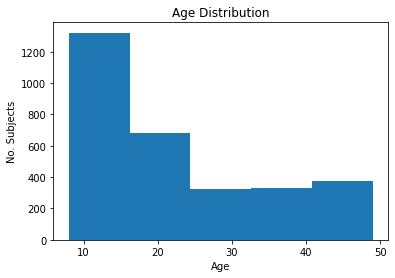

In [139]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_demographics.RIDAGEYR, bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('No. Subjects')
plt.show()


In [140]:
# get rid of colums we dont want
df_demographics_reduced = df_demographics[['RIAGENDR','RIDAGEMN', 'RIDRETH2']].copy()
# gender age(months), ethnicity

# BIA Data
df_BIA_no_Xitron = df_BIA.copy()
# df_BIA_rawdata_only = df_BIA.copy()
# df_BIA_rawdata_only.drop(columns=['BIDFIT', 'BIDECF', 'BIDTBW',  'BIDICF',  'BIDFFM', 'BIDFAT', 'BIDPFAT']) # less cols to drop, keep the raw data only
df_BIA_no_Xitron = df_BIA_no_Xitron.drop(columns=['SEQN','BIAEXSTS','BIDFIT', 'BIDECF', 'BIDTBW',  'BIDICF',  'BIDFFM', 'BIDFAT', 'BIDPFAT', ])


# Keep the estimated measurements for comparison
df_BIA_estimated_measurements = df_BIA[['SEQN','BIDFIT', 'BIDECF', 'BIDTBW',  'BIDICF',  'BIDFFM', 'BIDFAT', 'BIDPFAT', 'BIDTD', 'BIDALPHA', 'BIDFC']].copy()
df_BIA_reference_device_measurement =  df_BIA[['BIDPFAT']].copy()
# Sequence, body fat estimated, estimated measures...

# From DXA data, body fat as a percentage
target_variable = df_DXA['DXDTOPF'].copy()

# Only keep basic anthropometric measurements.
df_BodyMeas_measurements_extra = df_BodyMeas[['BMXWT','BMXHT', 'BMXWAIST', 'BMXTHICR',  'BMXLEG', 'BMXTRI', 'BMXSUB', 'BMXBMI', 'BMXARMC', 'BMXARML']].copy()
df_BodyMeas_measurements_min = df_BodyMeas[['BMXWT','BMXHT']].copy()
# weight(kg), standing height (cm), wait circum cm, thigh circum, upper leg length cm

In [141]:
df_BIA_no_Xitron

,BIDRECF,BIDRICF,BIDCM,BIDTD,BIDALPHA,BIDFC,BIXS005K,BIXS006K,BIXS007K,BIXS008K,...,BIXC378K,BIXC421K,BIXC469K,BIXC500K,BIXC582K,BIXC649K,BIXC723K,BIXC806K,BIXC898K,BIXC1M
0,568.4,1221.5,2.23,1.619,0.698,40.0,544.38,541.72,538.85,535.82,...,29.34,28.06,26.72,25.90,24.19,22.85,21.52,20.34,19.24,18.02
1,918.4,1704.1,1.17,9.964,0.679,53.0,882.34,877.90,873.28,869.23,...,71.46,70.37,69.49,68.72,68.30,68.04,68.00,68.07,68.70,69.57
2,724.9,1743.3,1.03,4.699,0.661,63.0,701.48,699.34,697.21,694.56,...,46.88,45.86,44.87,44.25,42.83,41.86,40.91,39.96,39.01,37.93
3,516.0,1107.8,2.17,5.083,0.693,46.0,496.24,493.97,491.20,488.54,...,31.71,30.77,29.91,29.33,28.38,27.63,26.82,26.15,25.55,24.43
4,590.0,1032.2,2.21,3.587,0.674,45.0,561.78,558.89,555.30,552.17,...,38.53,37.10,35.78,34.99,33.10,31.75,30.58,29.49,28.48,27.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,646.1,1387.2,1.75,4.671,0.694,45.0,620.75,617.15,614.08,611.04,...,38.83,37.65,36.52,36.03,34.28,33.32,32.47,31.72,30.82,30.45
3031,773.5,1723.1,0.83,6.587,0.685,77.0,752.26,749.79,747.83,746.31,...,59.51,58.42,57.24,56.65,54.87,54.10,53.22,52.56,51.53,50.87
3032,553.3,1065.5,2.43,3.687,0.656,41.0,524.90,520.82,518.14,515.10,...,32.98,31.79,30.80,30.03,29.01,28.22,27.19,26.50,25.81,24.77
3033,691.5,1551.0,1.13,6.981,0.696,63.0,670.75,667.94,665.69,663.64,...,49.69,48.69,47.64,46.86,46.12,45.28,44.63,44.08,43.53,43.94


In [142]:
# create df with demographic and body measurement data only
df_comparison_DXA_reference_device = pd.concat([df_demographics_reduced.RIDAGEMN, df_BIA_reference_device_measurement, target_variable], axis = 1)

# check for nans drop rows if so - https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
# if df_all_freq.isnull().values.any():
df_comparison_DXA_reference_device.isnull().sum().sum()
df_comparison_DXA_reference_device=df_comparison_DXA_reference_device.dropna(how='any')

df_comparison_DXA_reference_device = df_comparison_DXA_reference_device.reset_index(drop=True)

df_comparison_DXA_reference_device = df_comparison_DXA_reference_device[df_comparison_DXA_reference_device['RIDAGEMN'] > 18*12] # filter under 18 year olds

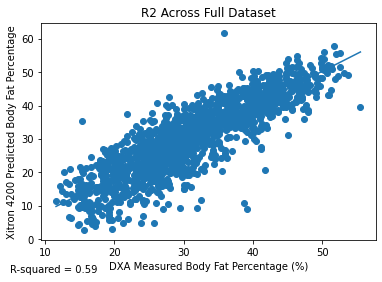

In [143]:
target = df_comparison_DXA_reference_device.DXDTOPF
BIDPFAT = df_comparison_DXA_reference_device.BIDPFAT
r_squared = r2_score(target, BIDPFAT)

plt.scatter(target,BIDPFAT)
plt.xlabel('DXA Measured Body Fat Percentage (%)')
plt.ylabel('Xitron 4200 Predicted Body Fat Percentage')
plt.title('R2 Across Full Dataset')

plt.plot(np.unique(target), np.poly1d(np.polyfit(target, BIDPFAT, 1))(np.unique(target)))

plt.text(5, -10, 'R-squared = %0.2f' % r_squared)
plt.show()

In [144]:
print(f"MSE: {mean_squared_error(target, BIDPFAT)}")
print(f"RMSE model: {mean_squared_error(target, BIDPFAT, squared=False)}")
print(f"MAE: {mean_absolute_error(target, BIDPFAT)}")
print(f"R2: {r2_score(target, BIDPFAT)}")

MSE: 32.39545145960624
RMSE model: 5.691700225732751
MAE: 4.389273591310251
R2: 0.586378917821021


In [145]:
scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2'}

# Train and testing function to output results

In [146]:
# function to reduce code duplication

def train_and_test_MLPRegressor(model, X_train, X_test, y_train, y_test, CV_flag=False):

  """
  model: instantiated regressor
  """
  # fit model
  model.fit(X_train, y_train)

  print(f"MSE model:  {mean_squared_error(y_test, model.predict(X_test))}")
  print(f"RMSE model: {mean_squared_error(y_test, model.predict(X_test), squared=False)}")
  print(f"R2:         {r2_score(y_test, model.predict(X_test))}")
  print(f"MAE:        {mean_absolute_error(y_test, model.predict(X_test))}")

  if CV_flag:
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True, return_estimator = True)
    print(f"Mean validation test scores:  {mean(scores['test_r2'])}")
    print(f"Mean testing scores:          {mean(scores['train_r2'])}")

  return

# Create model just using anthropometric data for comparison

In [147]:
df_demographics_reduced.head(2)

,RIAGENDR,RIDAGEMN,RIDRETH2
0,1,597,1
1,2,230,4


In [148]:
df_BodyMeas_measurements_extra.head(2)

,BMXWT,BMXHT,BMXWAIST,BMXTHICR,BMXLEG,BMXTRI,BMXSUB,BMXBMI,BMXARMC,BMXARML
0,92.5,178.3,99.9,56.2,45.2,17.4,38.6,29.10,35.8,39.7
1,59.2,162.0,81.6,47.0,39.7,20.3,16.8,22.56,26.0,34.5


In [149]:
# add age, gender and target variable to dataset
df_anthro_age_gender = pd.concat([df_demographics_reduced, df_BodyMeas_measurements_extra,  target_variable], axis = 1)

df_anthro_age_gender.isnull().sum().sum()
df_anthro_age_gender=df_anthro_age_gender.dropna(how='any')

df_anthro_age_gender = df_anthro_age_gender.reset_index(drop=True)

df_anthro_age_gender = df_anthro_age_gender[df_anthro_age_gender['RIDAGEMN'] > 18*12] # filter under 18 year olds

In [150]:
df_anthro_age_gender.head(2)

,RIAGENDR,RIDAGEMN,RIDRETH2,BMXWT,BMXHT,BMXWAIST,BMXTHICR,BMXLEG,BMXTRI,BMXSUB,BMXBMI,BMXARMC,BMXARML,DXDTOPF
0,1,597,1,92.5,178.3,99.9,56.2,45.2,17.4,38.6,29.10,35.8,39.7,31.2
1,2,230,4,59.2,162.0,81.6,47.0,39.7,20.3,16.8,22.56,26.0,34.5,41.5


In [151]:
X_anthro_age_gender = df_anthro_age_gender.drop(["DXDTOPF"], axis=1)
Y_anthro_age_gender = df_anthro_age_gender.DXDTOPF # DXA body fat % ie target variable

In [152]:
X_train_anthro, X_test_anthro, y_train_anthro, y_test_anthro = train_test_split(X_anthro_age_gender, Y_anthro_age_gender, test_size=0.4, random_state=seed)

In [153]:
# Scale data to increase performance.
scaler = StandardScaler()
X_train_scaled_anthro = scaler.fit_transform(X_train_anthro)
X_test_scaled_anthro = scaler.transform(X_test_anthro)

In [154]:
MLP_model_base_anthro = MLPRegressor(random_state = seed)

# train the model on the target values (y train)
MLP_model_base_anthro.fit(X_train_scaled_anthro, y_train_anthro)

print(f"MSE model: {mean_squared_error(y_test_anthro, MLP_model_base_anthro.predict(X_test_scaled_anthro))}")
print(f"RMSE model: {mean_squared_error(y_test_anthro, MLP_model_base_anthro.predict(X_test_scaled_anthro), squared=False)}")
print(f"R2: {r2_score(y_test_anthro, MLP_model_base_anthro.predict(X_test_scaled_anthro))}")
print(f"MAE: {mean_absolute_error(y_test_anthro, MLP_model_base_anthro.predict(X_test_scaled_anthro))}")

# scores = cross_validate(MLP_model_base_anthro, X_train_scaled_anthro, y_train_anthro, cv=5, scoring=scoring, return_train_score=True, return_estimator = True)

# print(f"Mean validation test scores: {mean(scores['test_r2'])}")
# print(f"Mean testing scores: {mean(scores['train_r2'])}")

MSE model: 25.764210401596774
RMSE model: 5.075845781896528
R2: 0.6016402026101322
MAE: 4.054965458731327


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [155]:
train_and_test_MLPRegressor(MLPRegressor(random_state = seed), X_train_scaled_anthro, X_test_scaled_anthro, y_train_anthro, y_test_anthro)

MSE model:  25.764210401596774
RMSE model: 5.075845781896528
R2:         0.6016402026101322
MAE:        4.054965458731327


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## tune hyperparameters

In [156]:
%%time

estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [10, 50, 100, 200],  # 4
          'activation': ['relu','tanh','logistic', 'identity'], # 4
          'learning_rate': ['constant','adaptive', 'invscaling'], # 3
          'solver': ['adam', 'sgd', 'lbfgs']} # 3

gsc = RandomizedSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train_scaled_anthro, y_train_anthro)

best_params_anthro = grid_result.best_params_
best_params_anthro

CPU times: user 1.4 s, sys: 650 ms, total: 2.05 s
Wall time: 20.6 s


{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 200,
 'activation': 'identity'}

In [157]:
# %%time
MLP_model_base_tuned_anthro = MLPRegressor(hidden_layer_sizes = best_params_anthro["hidden_layer_sizes"],
                        activation = best_params_anthro["activation"],
                        solver = best_params_anthro["solver"],
                        max_iter= 750,
                        random_state=seed)

train_and_test_MLPRegressor(MLP_model_base_tuned_anthro, X_train_scaled_anthro, X_test_scaled_anthro, y_train_anthro, y_test_anthro, CV_flag=True)

MSE model:  7.476706963054656
RMSE model: 2.734356773183532
R2:         0.8843970211188279
MAE:        2.146538766896354
Mean validation test scores:  0.8806855561337745
Mean testing scores:          0.8864083113760067


## Effect of reducing feature set to minimal anthro data

In [158]:
df_BodyMeas_measurements_min.head(2)

,BMXWT,BMXHT
0,92.5,178.3
1,59.2,162.0


In [159]:
df_BodyMeas_measurements_extra.head(2)

,BMXWT,BMXHT,BMXWAIST,BMXTHICR,BMXLEG,BMXTRI,BMXSUB,BMXBMI,BMXARMC,BMXARML
0,92.5,178.3,99.9,56.2,45.2,17.4,38.6,29.10,35.8,39.7
1,59.2,162.0,81.6,47.0,39.7,20.3,16.8,22.56,26.0,34.5


In [160]:
df_anthro_age_gender.head(2)

,RIAGENDR,RIDAGEMN,RIDRETH2,BMXWT,BMXHT,BMXWAIST,BMXTHICR,BMXLEG,BMXTRI,BMXSUB,BMXBMI,BMXARMC,BMXARML,DXDTOPF
0,1,597,1,92.5,178.3,99.9,56.2,45.2,17.4,38.6,29.10,35.8,39.7,31.2
1,2,230,4,59.2,162.0,81.6,47.0,39.7,20.3,16.8,22.56,26.0,34.5,41.5


In [161]:
df_anthro_age_gender_min = df_anthro_age_gender.drop(columns=['BMXTHICR','BMXLEG','BMXTRI', 'BMXSUB', 'BMXBMI',  'BMXARMC',  'BMXARML' ])

In [162]:
df_anthro_age_gender_min.head(2)

,RIAGENDR,RIDAGEMN,RIDRETH2,BMXWT,BMXHT,BMXWAIST,DXDTOPF
0,1,597,1,92.5,178.3,99.9,31.2
1,2,230,4,59.2,162.0,81.6,41.5


In [163]:
X_anthro_age_gender_min = df_anthro_age_gender_min.drop(["DXDTOPF"], axis=1)
Y_anthro_age_gender_min = df_anthro_age_gender_min.DXDTOPF # DXA body fat % ie target variable
X_train_anthro_min, X_test_anthro_min, y_train_anthro_min, y_test_anthro_min = train_test_split(X_anthro_age_gender_min, Y_anthro_age_gender_min, test_size=0.4, random_state=seed)
# Scale data to increase performance.
scaler = StandardScaler()
X_train_scaled_anthro_min = scaler.fit_transform(X_train_anthro_min)
X_test_scaled_anthro_min = scaler.transform(X_test_anthro_min)

In [164]:
# %%time
train_and_test_MLPRegressor(MLPRegressor(), X_train_scaled_anthro_min, X_test_scaled_anthro_min, y_train_anthro, y_test_anthro)

MSE model:  28.009433602659776
RMSE model: 5.2923939387256285
R2:         0.5669251212810704
MAE:        4.206924677154942


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [165]:
%%time

estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [10, 50, 100, 200],  # 4
          'activation': ['relu','tanh','logistic', 'identity'], # 4
          'learning_rate': ['constant','adaptive', 'invscaling'], # 3
          'solver': ['adam', 'sgd', 'lbfgs']} # 3

gsc = RandomizedSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train_scaled_anthro_min, y_train_anthro_min)

best_params_anthro_min = grid_result.best_params_
best_params_anthro_min

CPU times: user 1.55 s, sys: 892 ms, total: 2.44 s
Wall time: 22.6 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'solver': 'sgd',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 50,
 'activation': 'tanh'}

In [166]:
%%time
MLP_model_base_tuned_anthro_min = MLPRegressor(hidden_layer_sizes = best_params_anthro["hidden_layer_sizes"],
                        activation = best_params_anthro["activation"],
                        solver = best_params_anthro["solver"],
                        max_iter= 750,
                        random_state=seed)

train_and_test_MLPRegressor(MLP_model_base_tuned_anthro_min, X_train_scaled_anthro_min, X_test_scaled_anthro_min, y_train_anthro, y_test_anthro, CV_flag=True)

MSE model:  10.436245500517085
RMSE model: 3.230517837826791
R2:         0.8386373741599609
MAE:        2.587538494070632
Mean validation test scores:  0.8348146246351782
Mean testing scores:          0.8381472799285843
CPU times: user 4.01 s, sys: 3.52 s, total: 7.53 s
Wall time: 3.97 s


# Prepare relveant data and explore features

In [167]:
# create df with demographic and body measurement data only
df_all_freq = pd.concat([df_demographics_reduced, df_BodyMeas_measurements_min, df_BIA_no_Xitron, target_variable], axis = 1)

#drop cole modelling features
df_all_freq = df_all_freq.drop(columns=['BIDRECF',	'BIDRICF',	'BIDCM',	'BIDTD',	'BIDALPHA', 'BIDFC'])


# check for nans drop rows if so - https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
# if df_all_freq.isnull().values.any():
df_all_freq.isnull().sum().sum()
df_all_freq=df_all_freq.dropna(how='any')

df_all_freq = df_all_freq.reset_index(drop=True)

df_all_freq = df_all_freq[df_all_freq['RIDAGEMN'] > 18*12] # filter under 18 year olds

In [168]:
# df_all_freq.RIDAGEMN/12
newlist = [int(x/12) for x in df_all_freq.RIDAGEMN]

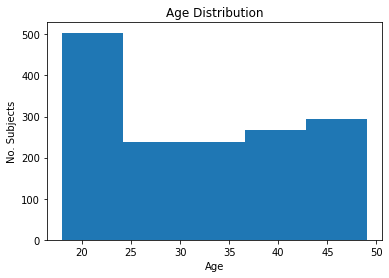

In [169]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(newlist, bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('No. Subjects')
plt.show()

In [170]:
df_all_freq.RIAGENDR.value_counts()

1    835
2    704
Name: RIAGENDR, dtype: int64

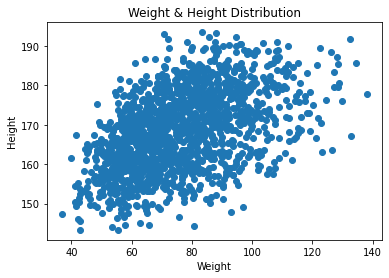

In [171]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_all_freq.BMXWT, df_all_freq.BMXHT)
plt.title('Weight & Height Distribution')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

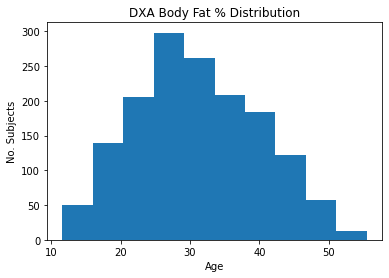

In [172]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_all_freq.DXDTOPF)
plt.title('DXA Body Fat % Distribution')
plt.xlabel('Age')
plt.ylabel('No. Subjects')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


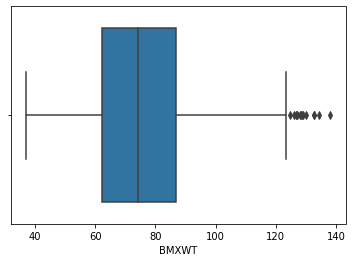

In [173]:
sns.boxplot(df_all_freq.BMXWT)
# sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


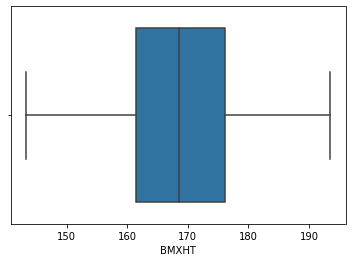

In [174]:
sns.boxplot(df_all_freq.BMXHT)

In [175]:
df_all_freq.describe

<bound method NDFrame.describe of       RIAGENDR  RIDAGEMN  RIDRETH2  BMXWT  BMXHT  BIXS005K  BIXS006K  \
0            1       597         1   92.5  178.3    544.38    541.72   
1            2       230         4   59.2  162.0    882.34    877.90   
3            1       518         2  111.8  190.1    496.24    493.97   
5            1       453         1   99.2  180.0    481.72    478.85   
7            2       405         3   75.8  166.1    712.30    709.52   
...        ...       ...       ...    ...    ...       ...       ...   
3022         2       484         1   60.0  161.2    654.55    651.77   
3024         1       373         1   91.4  179.5    494.46    490.94   
3026         2       451         1   70.4  160.8    701.65    697.78   
3027         2       231         2   53.4  161.6    626.77    623.28   
3032         2       282         3   92.5  159.1    524.90    520.82   

      BIXS007K  BIXS008K  BIXS009K  ...  BIXC421K  BIXC469K  BIXC500K  \
0       538.85    535.82    

In [176]:
df_all_freq

,RIAGENDR,RIDAGEMN,RIDRETH2,BMXWT,BMXHT,BIXS005K,BIXS006K,BIXS007K,BIXS008K,BIXS009K,...,BIXC421K,BIXC469K,BIXC500K,BIXC582K,BIXC649K,BIXC723K,BIXC806K,BIXC898K,BIXC1M,DXDTOPF
0,1,597,1,92.5,178.3,544.38,541.72,538.85,535.82,533.06,...,28.06,26.72,25.90,24.19,22.85,21.52,20.34,19.24,18.02,31.2
1,2,230,4,59.2,162.0,882.34,877.90,873.28,869.23,864.64,...,70.37,69.49,68.72,68.30,68.04,68.00,68.07,68.70,69.57,41.5
3,1,518,2,111.8,190.1,496.24,493.97,491.20,488.54,486.20,...,30.77,29.91,29.33,28.38,27.63,26.82,26.15,25.55,24.43,27.7
5,1,453,1,99.2,180.0,481.72,478.85,475.80,473.19,470.02,...,26.50,25.40,24.44,23.46,22.34,21.43,20.60,19.82,19.38,26.6
7,2,405,3,75.8,166.1,712.30,709.52,706.43,704.12,701.33,...,46.86,46.17,45.77,45.02,44.93,44.64,44.54,44.76,44.49,45.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,2,484,1,60.0,161.2,654.55,651.77,649.02,646.50,644.61,...,36.67,35.59,34.69,33.61,32.75,31.73,31.00,29.84,28.83,34.6
3024,1,373,1,91.4,179.5,494.46,490.94,487.46,484.01,480.32,...,31.35,30.17,29.63,27.98,27.02,25.97,24.99,24.17,23.31,26.9
3026,2,451,1,70.4,160.8,701.65,697.78,695.06,692.29,689.77,...,42.81,41.75,41.42,40.07,39.26,38.38,37.97,37.01,36.84,40.9
3027,2,231,2,53.4,161.6,626.77,623.28,620.86,618.15,615.70,...,43.36,42.26,41.55,41.04,40.56,39.74,39.34,38.99,38.68,26.3


## Create 3 freq dataset 5k 50k 200k

In [177]:
df_3_freqs =  df_all_freq[['RIAGENDR', 'RIDAGEMN', 'RIDRETH2', 'BMXWT', 'BMXHT', 'BIXS005K', 'BIXS050K', 'BIXS200K', 'BIXC005K', 'BIXC050K', 'BIXC200K', 'DXDTOPF']].copy()

In [178]:
df_3_freqs.head(2)

,RIAGENDR,RIDAGEMN,RIDRETH2,BMXWT,BMXHT,BIXS005K,BIXS050K,BIXS200K,BIXC005K,BIXC050K,BIXC200K,DXDTOPF
0,1,597,1,92.5,178.3,544.38,467.70,421.35,28.24,54.86,38.05,31.2
1,2,230,4,59.2,162.0,882.34,759.54,670.05,45.31,96.63,80.61,41.5


## Seperate target variable and scale data.

In [179]:
X_all_freq = df_all_freq.drop(["DXDTOPF"], axis=1)
Y_all_freq = df_all_freq.DXDTOPF # DXA body fat % ie target variable
# df_no_BIA = df_no_BIA.drop(columns=['DXDTOPF'])

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_all_freq, Y_all_freq, test_size=0.4, random_state=seed)

In [181]:
# Scale data to increase performance.
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [182]:
 train_scaled

array([[-0.92986368, -1.2305188 , -0.97578286, ..., -0.2504375 ,
        -0.19988107, -0.21936186],
       [ 1.07542645, -0.06109003, -0.1155655 , ..., -0.11119882,
        -0.11644099, -0.13862282],
       [ 1.07542645, -1.31229704,  0.74465186, ...,  0.02388643,
         0.00734978, -0.00593373],
       ...,
       [-0.92986368,  0.29873421, -0.1155655 , ..., -0.29038951,
        -0.28021726, -0.33321906],
       [ 1.07542645, -0.7807385 , -0.97578286, ...,  0.23689788,
         0.22936979,  0.29169678],
       [-0.92986368, -0.42909209,  0.74465186, ..., -0.29632298,
        -0.28934637, -0.34642303]])

# Use a base MLP Regressor model

In [183]:
scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2'}

In [184]:
# ok remove all BIA data and test model on anthro

In [185]:
MLP_model_base = MLPRegressor(random_state = seed)

# train the model on the target values (y train)
MLP_model_base.fit(train_scaled, y_train)

print(f"MSE model: {mean_squared_error(y_test, MLP_model_base.predict(test_scaled))}")
print(f"RMSE model: {mean_squared_error(y_test, MLP_model_base.predict(test_scaled), squared=False)}")
print(f"R2: {r2_score(y_test, MLP_model_base.predict(test_scaled))}")
print(f"MAE: {mean_absolute_error(y_test, MLP_model_base.predict(test_scaled))}")

scores = cross_validate(MLP_model_base, train_scaled.astype(int), y_train.astype(int), cv=5, scoring=scoring, return_train_score=True, return_estimator = True)

print(f"Mean validation test scores: {mean(scores['test_r2'])}")
print(f"Mean testing scores: {mean(scores['train_r2'])}")



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MSE model: 36.25049775061164
RMSE model: 6.020838625192644
R2: 0.5516083669888732
MAE: 4.569808518861497


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Mean validation test scores: 0.4960360649656305
Mean testing scores: 0.6871914661522123


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Use grid search to find more appropriate hyperparameters

In [186]:
%%time

estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [10, 50, 100, 200],  # 4
          'activation': ['relu','tanh','logistic', 'identity'], # 4
          'learning_rate': ['constant','adaptive', 'invscaling'], # 3
          'solver': ['adam', 'sgd', 'lbfgs']} # 3

# gsc = GridSearchCV(
#     estimator,
#     param_grid,
#     cv=5, scoring='r2', verbose=0, n_jobs=-1)

gsc = RandomizedSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(train_scaled, y_train)

best_params = grid_result.best_params_
best_params

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [ -6.44676911   0.86108871   0.79946609  -0.13354255   0.85882599
   0.86017529   0.8140833  -36.49860919   0.79754804          nan]
  category=UserWarning,


CPU times: user 2.83 s, sys: 1.36 s, total: 4.19 s
Wall time: 43.5 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'solver': 'sgd',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 100,
 'activation': 'relu'}

In [187]:
initial_params_all_freqs = {'solver' : 'sgd',
                  'learning_rate': 'adaptive',
                  'hidden_layer_sizes': 10,
                  'activation': 'logistic'}

# High Performance Model Using All Available Frequencies

In [188]:
# %%time
MLP_model_base_tuned_high_performance = MLPRegressor(hidden_layer_sizes = (10,),
                        activation = initial_params_all_freqs["activation"],
                        solver = initial_params_all_freqs["solver"],
                        max_iter= 750,
                        random_state=seed,
              )

train_and_test_MLPRegressor(MLP_model_base_tuned_high_performance, train_scaled, test_scaled, y_train, y_test, CV_flag=True)


MSE model:  8.042639007826368
RMSE model: 2.835954690721692
R2:         0.9005185511314142
MAE:        2.2184932827828634
Mean validation test scores:  0.8832768664868347
Mean testing scores:          0.906361668418859


# Repeat Evaluation Experiments

In [189]:
meanCVscores = []
meanHoldOutscores = []

MLP_model_base_tuned_high_performanceRE = MLPRegressor(hidden_layer_sizes = (10,),
                        activation = initial_params_all_freqs["activation"],
                        solver = initial_params_all_freqs["solver"],
                        max_iter= 750)

for i in range(0, 51):
  run_scores_r2 = []
  run_scores_MAE = []

  # for j in  range(0, k):
  X_trainRE, X_testRE, y_trainRE, y_testRE = train_test_split(X_all_freq, Y_all_freq, test_size=0.2, shuffle=True)

  # Scale data to increase performance.
  train_scaledRE = scaler.fit_transform(X_trainRE)
  test_scaledRE = scaler.transform(X_testRE)

  modelFit = MLP_model_base_tuned_high_performanceRE.fit(train_scaledRE, y_trainRE)
  predictionsRE = modelFit.predict(test_scaledRE)

  # make prediciton on hold out set
  skill_r2_hold_out = r2_score(y_testRE, predictionsRE)

  # print(skill_r2_hold_out)

  meanHoldOutscores.append(skill_r2_hold_out)

  scoresCV = cross_validate(MLP_model_base_tuned_high_performanceRE, train_scaledRE, y_trainRE, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

  scoresCV_test = mean(scoresCV['test_r2'])

  # print(scoresCV)

  meanCVscores.append(scoresCV_test)


In [190]:
meanHoldOutscores

[0.9073663640301671,
 0.9016751755383057,
 0.9021982397102435,
 0.8926815371793597,
 0.9136225342835972,
 0.8816097775476017,
 0.8974280803417723,
 0.8931551173406618,
 0.8778565364724298,
 0.907027508532468,
 0.8773078944063403,
 0.9013670935173843,
 0.894260656897469,
 0.8734530927917077,
 0.8973421560769502,
 0.9011687909969562,
 0.8965033807932217,
 0.8891605541400894,
 0.8763269773837645,
 0.8831459216464517,
 0.8791305260152431,
 0.890281288853318,
 0.8852677005420996,
 0.8929792526725524,
 0.9003171080930157,
 0.9019198962580941,
 0.9000418396430235,
 0.8811672428116363,
 0.8656541001627853,
 0.8773033593532197,
 0.9092126938796564,
 0.8878013327312859,
 0.902562584415284,
 0.9165046472271005,
 0.882336831487581,
 0.9006136006733279,
 0.8777715706230149,
 0.8944703431749144,
 0.8904006186946049,
 0.9073163638409105,
 0.8730301224230093,
 0.9068972376333467,
 0.917353011516437,
 0.8441743458281161,
 0.9041347459749756,
 0.8957213370559126,
 0.8937813956846414,
 0.9097232814230065

In [191]:
meanCVscores

[0.8804502435569986,
 0.8813563500370704,
 0.8850422685801103,
 0.8881192400291755,
 0.8828098515732001,
 0.891792383406645,
 0.8812580265792483,
 0.8862768553868408,
 0.8893301943464491,
 0.8839919278788535,
 0.895614061571619,
 0.887811081736704,
 0.8839817557617986,
 0.8887340090043405,
 0.8905884055796826,
 0.8835159601136592,
 0.886741329408463,
 0.8913465057906613,
 0.8968277477151613,
 0.8913864679060965,
 0.884072454758148,
 0.893049470169438,
 0.8887428379286701,
 0.8881974854296946,
 0.8913379971722586,
 0.8848606676845379,
 0.8899455817799392,
 0.8908540596773344,
 0.8927610581357495,
 0.8888446121791471,
 0.8804914006659528,
 0.8917721964912401,
 0.8830324008571981,
 0.8887358967653938,
 0.8875542772086533,
 0.8931075644557829,
 0.8898563992140553,
 0.8872112587096351,
 0.8844600152922248,
 0.8876460307318945,
 0.8916687313973906,
 0.8829422582668414,
 0.8810411148783039,
 0.8965992850810085,
 0.8817632968808311,
 0.8887423519290808,
 0.8869952463874459,
 0.8814402313756748

(array([7., 4., 7., 4., 6., 8., 8., 3., 1., 3.]),
 array([0.88045024, 0.88208799, 0.88372574, 0.88536349, 0.88700125,
        0.888639  , 0.89027675, 0.8919145 , 0.89355225, 0.89519   ,
        0.89682775]),
 <a list of 10 Patch objects>)

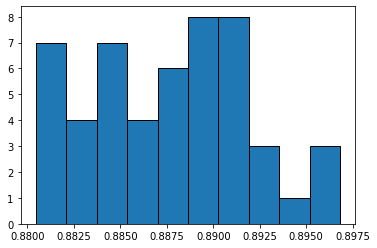

In [192]:
#create histogram to visualize values in dataset
plt.hist(meanCVscores, edgecolor='black')

In [193]:
import statistics
import math

In [194]:
standard_error = statistics.stdev(meanCVscores) / math.sqrt(len(meanCVscores))

In [195]:
statistics.stdev(meanCVscores)

0.004364760426550797

In [196]:
standard_error

0.0006111887096852682

In [197]:
from scipy.stats import shapiro

In [198]:
#perform Shapiro-Wilk test for normality
shapiro(meanCVscores)

ShapiroResult(statistic=0.9702286124229431, pvalue=0.2260461449623108)

In [199]:
# p value > 0.5 == scores is a normal distribution

In [200]:
interval = standard_error * 1.96
lower_interval = mean(meanCVscores) - interval
upper_interval = mean(meanCVscores) + interval

In [201]:
lower_interval

0.886421549916006

In [202]:
upper_interval

0.8888174096579722

### For comparison with other studies

In [203]:
from scipy.stats import pearsonr

In [204]:
# calculate Pearson's correlation
corr, _ = pearsonr(y_test, MLP_model_base_tuned_high_performance.predict(test_scaled))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.949


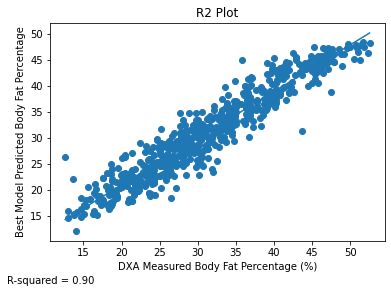

In [205]:
target = y_test
BIDPFAT =  MLP_model_base_tuned_high_performance.predict(test_scaled)
r_squared = r2_score(target, BIDPFAT)

plt.scatter(target,BIDPFAT)
plt.xlabel('DXA Measured Body Fat Percentage (%)')
plt.ylabel('Best Model Predicted Body Fat Percentage')
plt.title('R2 Plot')

plt.plot(np.unique(target), np.poly1d(np.polyfit(target, BIDPFAT, 1))(np.unique(target)))

plt.text(5, 2, 'R-squared = %0.2f' % r_squared)
plt.show()

## try normalizing data

In [206]:
# Scale data to increase performance.
normalizer = preprocessing.Normalizer().fit(X_all_freq)
X_all_freq_normalized = normalizer.transform(X_all_freq)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_all_freq_normalized, Y_all_freq, test_size=0.4, random_state=seed)

In [207]:
%%time

estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': (400, 1),  # 4
          'activation': ['relu','tanh','logistic', 'identity'], # 4
          'learning_rate': ['constant','adaptive', 'invscaling'], # 3
          'solver': ['adam', 'sgd', 'lbfgs']} # 3

# gsc = GridSearchCV(
#     estimator,
#     param_grid,
#     cv=5, scoring='r2', verbose=0, n_jobs=-1)

gsc = RandomizedSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train_norm, y_train)

best_params_norm = grid_result.best_params_
best_params_norm

CPU times: user 981 ms, sys: 240 ms, total: 1.22 s
Wall time: 54.2 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'solver': 'lbfgs',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 1,
 'activation': 'logistic'}

In [208]:
# MLP_model_base_norm = MLPRegressor(hidden_layer_sizes = (400, 1),random_state = seed, max_iter=1000)

MLP_model_base_norm = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"],
                        activation = best_params["activation"],
                        solver = best_params["solver"],
                        max_iter= 1050,
                        random_state=seed,
              )

# train the model on the target values (y train)
MLP_model_base_norm.fit(X_train_norm, y_train_norm)

print(f"MSE model: {mean_squared_error(y_test_norm, MLP_model_base_norm.predict(test_scaled))}")
print(f"RMSE model: {mean_squared_error(y_test_norm, MLP_model_base_norm.predict(test_scaled), squared=False)}")
print(f"R2: {r2_score(y_test_norm, MLP_model_base_norm.predict(test_scaled))}")
print(f"MAE: {mean_absolute_error(y_test_norm, MLP_model_base_norm.predict(test_scaled))}")

# scores = cross_validate(MLP_model_base_norm, X_train_norm.astype(int), y_train.astype(int), cv=5, scoring=scoring, return_train_score=True, return_estimator = True)

# print(f"Mean validation test scores: {mean(scores['test_r2'])}")
# print(f"Mean testing scores: {mean(scores['train_r2'])}")


MSE model: 120621.08728730533
RMSE model: 347.3054668261145
R2: -1490.9929286604058
MAE: 207.90727933241652


# normalization not suitable for this problem

# Use less freqs

In [209]:
X_3_freq = df_3_freqs.drop(["DXDTOPF"], axis=1)
Y_all_freq = df_all_freq.DXDTOPF # DXA body fat % ie target variable
# df_no_BIA = df_no_BIA.drop(columns=['DXDTOPF'])

In [210]:
X_3_freq.head(4)

,RIAGENDR,RIDAGEMN,RIDRETH2,BMXWT,BMXHT,BIXS005K,BIXS050K,BIXS200K,BIXC005K,BIXC050K,BIXC200K
0,1,597,1,92.5,178.3,544.38,467.70,421.35,28.24,54.86,38.05
1,2,230,4,59.2,162.0,882.34,759.54,670.05,45.31,96.63,80.61
3,1,518,2,111.8,190.1,496.24,429.31,385.58,23.75,50.20,37.94
5,1,453,1,99.2,180.0,481.72,404.53,362.28,29.21,52.32,35.27


In [211]:
X_train_3_freqs, X_test_3_freqs, y_train, y_test = train_test_split(X_3_freq, Y_all_freq, test_size=0.4, random_state=seed)

In [212]:
X_train_3_freqs.head(2)

,RIAGENDR,RIDAGEMN,RIDRETH2,BMXWT,BMXHT,BIXS005K,BIXS050K,BIXS200K,BIXC005K,BIXC050K,BIXC200K
1437,1,235,1,59.1,177.4,746.44,632.84,551.24,39.64,86.58,76.69
1163,2,378,2,98.6,161.9,603.61,532.13,478.39,25.62,57.53,46.91


In [213]:
# Scale data to increase performance.
scaler = StandardScaler()
train_scaled_3_freqs = scaler.fit_transform(X_train_3_freqs)
test_scaled_3_freqs = scaler.transform(X_test_3_freqs)

In [214]:
MLP_model_3_freqs = MLPRegressor(random_state = seed)

MLP_model_3_freqs.fit(train_scaled_3_freqs, y_train)

print(f"MSE model: {mean_squared_error(y_test, MLP_model_3_freqs.predict(test_scaled_3_freqs))}")
print(f"RMSE model: {mean_squared_error(y_test, MLP_model_3_freqs.predict(test_scaled_3_freqs), squared=False)}")
print(f"R2: {r2_score(y_test, MLP_model_3_freqs.predict(test_scaled_3_freqs))}")
print(f"MAE: {mean_absolute_error(y_test, MLP_model_3_freqs.predict(test_scaled_3_freqs))}")

# scores = cross_validate(MLP_model_3_freqs, train_scaled_3_freqs, y_train, cv=5, scoring=scoring, return_train_score=True, return_estimator = True)
# print(mean(scores['test_r2']))
# print(mean(scores['train_r2']))

MSE model: 17.5158835139233
RMSE model: 4.185198145120886
R2: 0.783341578742647
MAE: 3.3401426579698694


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Reasonable peformance, tune hyperparameters

In [215]:
%%time

estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [1, 10, 100, 50, 200],  # 4
          'activation': ['relu','tanh','logistic', 'identity'], # 4
          'learning_rate': ['constant','adaptive', 'invscaling'], # 3
          'solver': ['adam', 'sgd', 'lbfgs']} # 3

gsc = RandomizedSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(train_scaled_3_freqs, y_train)

best_params_3_freqs = grid_result.best_params_
best_params_3_freqs

CPU times: user 863 ms, sys: 104 ms, total: 966 ms
Wall time: 23.9 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'solver': 'sgd',
 'learning_rate': 'constant',
 'hidden_layer_sizes': 10,
 'activation': 'tanh'}

In [216]:
best_params_3_freqs = {'solver': 'sgd',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 200,
 'activation': 'tanh'}

In [217]:
# MLP_model_base_norm = MLPRegressor(hidden_layer_sizes = (400, 1),random_state = seed, max_iter=1000)

MLP_model_3_freqs = MLPRegressor(hidden_layer_sizes =(200,),
                        activation = best_params_3_freqs["activation"],
                        solver = best_params_3_freqs["solver"],
                        max_iter= 500,
                        random_state=seed,
              )

# train the model on the target values (y train)
MLP_model_3_freqs.fit(train_scaled_3_freqs, y_train)

print(f"MSE model: {mean_squared_error(y_test, MLP_model_3_freqs.predict(test_scaled_3_freqs))}")
print(f"RMSE model: {mean_squared_error(y_test, MLP_model_3_freqs.predict(test_scaled_3_freqs), squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, MLP_model_3_freqs.predict(test_scaled_3_freqs))}")
print(f"R2: {r2_score(y_test, MLP_model_3_freqs.predict(test_scaled_3_freqs))}")

scores = cross_validate(MLP_model_3_freqs, train_scaled_3_freqs, y_train, cv=5, scoring=scoring, return_train_score=True, return_estimator = True)

print(f"Mean validation test scores: {mean(scores['test_r2'])}")
print(f"Mean testing scores: {mean(scores['train_r2'])}")

MSE model: 7.506904249027268
RMSE model: 2.739873035202045
MAE: 2.1787612133636225
R2: 0.9071451907160997


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Mean validation test scores: 0.886787202699565
Mean testing scores: 0.9057580079909957


In [218]:
meanCVscores3 = []
meanHoldOutscores3 = []

MLP_model_base_tuned_high_performanceRE3 = MLPRegressor(hidden_layer_sizes = (10,),
                        activation = best_params_3_freqs["activation"],
                        solver = best_params_3_freqs["solver"],
                        max_iter= 750)

for i in range(0,51):
  run_scores_r2 = []
  run_scores_MAE = []

  # for j in  range(0, k):
  X_trainRE3, X_testRE3, y_trainRE3, y_testRE3 = train_test_split(X_3_freq, Y_all_freq, test_size=0.2, shuffle=True)

  # Scale data to increase performance.
  train_scaledRE3 = scaler.fit_transform(X_trainRE3)
  test_scaledRE3 = scaler.transform(X_testRE3)

  modelFit3 = MLP_model_base_tuned_high_performanceRE.fit(train_scaledRE3, y_trainRE3)
  predictionsRE3 = modelFit3.predict(test_scaledRE3)

  # make prediciton on hold out set
  skill_r2_hold_out3 = r2_score(y_testRE3, predictionsRE3)

  meanHoldOutscores3.append(skill_r2_hold_out3)

  scoresCV3 = cross_validate(MLP_model_base_tuned_high_performanceRE3, train_scaledRE3, y_trainRE3, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

  scoresCV_test3 = mean(scoresCV3['test_r2'])

  # print(scoresCV)

  meanCVscores3.append(scoresCV_test3)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [219]:
meanHoldOutscores3

[0.8832922782666368,
 0.9100768977898828,
 0.8526639174429254,
 0.9024888233995076,
 0.9069111794197443,
 0.8937599204720162,
 0.9204635195364429,
 0.89084811530852,
 0.8702272924699801,
 0.8955761444231963,
 0.9013350992433362,
 0.9075753070037175,
 0.8969389178647487,
 0.9047963128991269,
 0.88123321739171,
 0.9082211420228017,
 0.8871870232691121,
 0.879130580912503,
 0.9034147374712777,
 0.8963330474960196,
 0.8967069896546079,
 0.9139406948247999,
 0.8718883286078137,
 0.9024972202459897,
 0.901322982554394,
 0.8976922587911575,
 0.8888386728361597,
 0.8833031120596382,
 0.8576907283922588,
 0.8871792197720727,
 0.9042745912613233,
 0.9053037596523432,
 0.8929101588519789,
 0.910405087871283,
 0.9103928900709479,
 0.897412751377731,
 0.8977900376139016,
 0.8912795102194035,
 0.9005256529519069,
 0.9019663007063979,
 0.9140216375764105,
 0.8979549820846436,
 0.8878590653267635,
 0.8909782618876396,
 0.8885972405773457,
 0.8830019333603647,
 0.8719475520817107,
 0.8970226787634094,


In [220]:
meanCVscores3

[0.8966959694686002,
 0.8952392556660447,
 0.9028094140973367,
 0.8931215757588273,
 0.8952473105329801,
 0.8939940654637353,
 0.884782747864314,
 0.8947068662101418,
 0.8992798697517227,
 0.8959159751019048,
 0.8947238620028479,
 0.8947206139047441,
 0.8943306309018947,
 0.891197558065435,
 0.8919925510719937,
 0.8870300297314275,
 0.8937021079554153,
 0.8983538876417618,
 0.8946331525539053,
 0.8977358112639731,
 0.8921803048777172,
 0.8904285816093024,
 0.8999277202987545,
 0.886609544442565,
 0.8902295957127876,
 0.8908787307810794,
 0.8939769426192997,
 0.89849270268931,
 0.9042453274807005,
 0.896744404184641,
 0.8953485130147382,
 0.8900007163416566,
 0.8940430092771068,
 0.8915382830335841,
 0.8922781114178505,
 0.8917203229316183,
 0.8924790148583253,
 0.8925554540088241,
 0.8917786072070204,
 0.8922472611937211,
 0.8907667223811655,
 0.8953552235138662,
 0.8958273510467084,
 0.8936647849912251,
 0.8970149719609436,
 0.8981944191279396,
 0.9000839220157983,
 0.8933201788072769

(array([ 2.,  1.,  3., 13.,  9., 10.,  7.,  4.,  0.,  2.]),
 array([0.88478275, 0.88672901, 0.88867526, 0.89062152, 0.89256778,
        0.89451404, 0.8964603 , 0.89840655, 0.90035281, 0.90229907,
        0.90424533]),
 <a list of 10 Patch objects>)

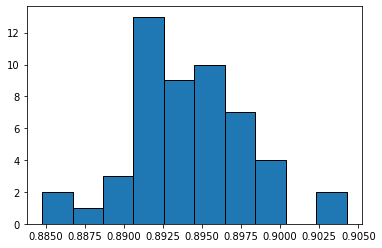

In [221]:
#create histogram to visualize values in dataset
plt.hist(meanCVscores3, edgecolor='black')

In [222]:
standard_error = statistics.stdev(meanCVscores3) / math.sqrt(len(meanCVscores3))

In [223]:
statistics.stdev(meanCVscores3)

0.0037493992391102546

In [224]:
standard_error

0.0005250209081595863

In [225]:
#perform Shapiro-Wilk test for normality
shapiro(meanCVscores3)

ShapiroResult(statistic=0.9809808135032654, pvalue=0.5811405181884766)

In [226]:
# p value > 0.5 == scores is a normal distribution

In [227]:
interval = standard_error * 1.96
lower_interval = mean(meanCVscores3) - interval
upper_interval = mean(meanCVscores3) + interval

In [228]:
lower_interval

0.8932230599073222

In [229]:
upper_interval

0.8952811418673078

will dimensionality recution improve above score?

# Principal Component Analysis PCA - all frequencies

In [230]:
X_all_freq.head(2)

,RIAGENDR,RIDAGEMN,RIDRETH2,BMXWT,BMXHT,BIXS005K,BIXS006K,BIXS007K,BIXS008K,BIXS009K,...,BIXC378K,BIXC421K,BIXC469K,BIXC500K,BIXC582K,BIXC649K,BIXC723K,BIXC806K,BIXC898K,BIXC1M
0,1,597,1,92.5,178.3,544.38,541.72,538.85,535.82,533.06,...,29.34,28.06,26.72,25.90,24.19,22.85,21.52,20.34,19.24,18.02
1,2,230,4,59.2,162.0,882.34,877.90,873.28,869.23,864.64,...,71.46,70.37,69.49,68.72,68.30,68.04,68.00,68.07,68.70,69.57


In [231]:
# Scale all X data for PCA.
scaler = StandardScaler()
X_all_freq_scaled = scaler.fit_transform(X_all_freq)

In [232]:
X_all_freq_scaled

array([[-0.91821227,  1.76129511, -0.9784894 , ..., -0.31781675,
        -0.33103151, -0.38344979],
       [ 1.08907279, -1.26976303,  1.66188789, ...,  0.52817577,
         0.54469829,  0.62792935],
       [-0.91821227,  1.108833  , -0.09836363, ..., -0.21483715,
        -0.21930779, -0.25768955],
       ...,
       [ 1.08907279,  0.55547906, -0.9784894 , ..., -0.00533303,
        -0.01639911, -0.01421302],
       [ 1.08907279, -1.26150401, -0.09836363, ...,  0.0189496 ,
         0.01865841,  0.02188664],
       [ 1.08907279, -0.8402943 ,  0.78176213, ..., -0.20863356,
        -0.21470428, -0.25101896]])

In [233]:
# make pca equal to number of current feature (105) to start with
pca_105 = PCA(n_components = 105, random_state=0)
pca_105.fit(X_all_freq_scaled)
X_pca_105 = pca_105.transform(X_all_freq_scaled)

In [234]:
print(f"Variance explained by all 105 principal components = {sum(pca_105.explained_variance_ratio_ * 100)}")

Variance explained by all 105 principal components = 100.00000000000004


In [235]:
pca_105.explained_variance_ratio_ * 100

array([6.60972452e+01, 1.78307803e+01, 5.71668615e+00, 3.73409730e+00,
       1.31796812e+00, 1.14625328e+00, 9.93362006e-01, 7.93584898e-01,
       6.92225649e-01, 4.11551371e-01, 3.55531080e-01, 2.25493569e-01,
       1.65919367e-01, 1.47770404e-01, 7.44642071e-02, 6.04751136e-02,
       5.07563795e-02, 4.12858834e-02, 2.55961011e-02, 1.89074612e-02,
       1.53045882e-02, 1.26970375e-02, 1.06291976e-02, 9.25772509e-03,
       8.05386951e-03, 7.52925650e-03, 5.16114465e-03, 4.84176749e-03,
       4.22228097e-03, 3.19450162e-03, 2.61561400e-03, 2.49731781e-03,
       1.95443497e-03, 1.80424849e-03, 1.42209091e-03, 8.97695720e-04,
       7.86062152e-04, 7.17436998e-04, 6.36297620e-04, 5.71548098e-04,
       4.82858167e-04, 3.89682369e-04, 3.76110693e-04, 3.16244305e-04,
       3.06826229e-04, 2.88422531e-04, 2.33460154e-04, 2.23849080e-04,
       2.03460164e-04, 1.95065357e-04, 1.87020939e-04, 1.67874826e-04,
       1.50558644e-04, 1.48429163e-04, 1.40432209e-04, 1.30518052e-04,
      

In [236]:
np.cumsum(pca_105.explained_variance_ratio_ * 100)

array([ 66.0972452 ,  83.9280255 ,  89.64471165,  93.37880894,
        94.69677706,  95.84303034,  96.83639235,  97.62997724,
        98.32220289,  98.73375426,  99.08928534,  99.31477891,
        99.48069828,  99.62846868,  99.70293289,  99.76340801,
        99.81416438,  99.85545027,  99.88104637,  99.89995383,
        99.91525842,  99.92795546,  99.93858465,  99.94784238,
        99.95589625,  99.9634255 ,  99.96858665,  99.97342842,
        99.9776507 ,  99.9808452 ,  99.98346081,  99.98595813,
        99.98791257,  99.98971681,  99.99113891,  99.9920366 ,
        99.99282266,  99.9935401 ,  99.9941764 ,  99.99474795,
        99.9952308 ,  99.99562049,  99.9959966 ,  99.99631284,
        99.99661967,  99.99690809,  99.99714155,  99.9973654 ,
        99.99756886,  99.99776393,  99.99795095,  99.99811882,
        99.99826938,  99.99841781,  99.99855824,  99.99868876,
        99.99881398,  99.99893246,  99.99903512,  99.99913173,
        99.99921267,  99.99928731,  99.99935354,  99.99

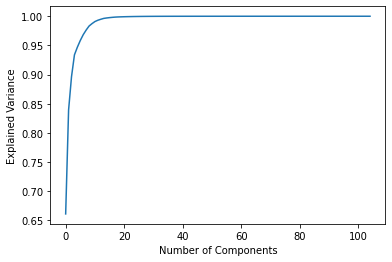

In [237]:
plt.plot(np.cumsum(pca_105.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

In [238]:
pca_2 = PCA(n_components = 2, random_state=0)
pca_2.fit(X_all_freq_scaled)
X_pca_2 = pca_2.transform(X_all_freq_scaled)

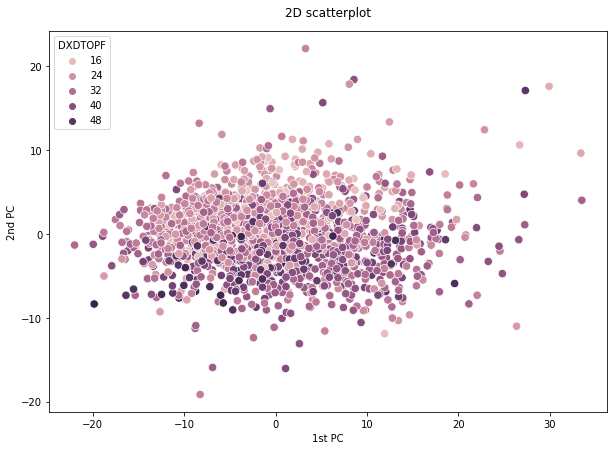

In [239]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70, hue=Y_all_freq)

plt.title("2D scatterplot", pad=15)
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.savefig('2d_scatter.png')

In [240]:
# 95% variablity
pca_95 = PCA(n_components = 0.95, random_state=0)
pca_95.fit(X_all_freq_scaled)
X_pca_95 = pca_95.transform(X_all_freq_scaled)

In [241]:
X_all_freq_scaled

array([[-0.91821227,  1.76129511, -0.9784894 , ..., -0.31781675,
        -0.33103151, -0.38344979],
       [ 1.08907279, -1.26976303,  1.66188789, ...,  0.52817577,
         0.54469829,  0.62792935],
       [-0.91821227,  1.108833  , -0.09836363, ..., -0.21483715,
        -0.21930779, -0.25768955],
       ...,
       [ 1.08907279,  0.55547906, -0.9784894 , ..., -0.00533303,
        -0.01639911, -0.01421302],
       [ 1.08907279, -1.26150401, -0.09836363, ...,  0.0189496 ,
         0.01865841,  0.02188664],
       [ 1.08907279, -0.8402943 ,  0.78176213, ..., -0.20863356,
        -0.21470428, -0.25101896]])

In [242]:
# split data before feeding into model
X_train_pca_95, X_test_pca_95, y_train, y_test = train_test_split(X_pca_95, Y_all_freq, test_size=0.4, random_state=seed)

In [243]:
MLP_model_PCA_95 = MLPRegressor(random_state = seed,max_iter=1000)
train_and_test_MLPRegressor(MLP_model_PCA_95, X_train_pca_95, X_test_pca_95, y_train, y_test)

MSE model:  38.26336679254055
RMSE model: 6.185738985160993
R2:         0.5267106775017594
MAE:        4.772557973228797


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [244]:
%%time
# grid search for above PCA model
estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [10, 50, 100, 200], #(100, ) # 4
          'activation': ['relu','tanh','logistic', 'identity'], # 4
          'learning_rate': ['constant','adaptive', 'invscaling'], # 3
          'solver': ['adam', 'sgd', 'lbfgs']} # 3

gsc = RandomizedSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train_pca_95, y_train)

best_params_pca_95 = grid_result.best_params_
best_params_pca_95

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [ 0.38426187  0.33883329 -0.04372601  0.42838297  0.44962871  0.42829708
 -0.75691906         nan  0.47216211  0.41733575]
  category=UserWarning,


CPU times: user 861 ms, sys: 327 ms, total: 1.19 s
Wall time: 34.1 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'solver': 'lbfgs',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 10,
 'activation': 'tanh'}

In [245]:
MLP_model_PCA_95_tuned = MLPRegressor(hidden_layer_sizes = best_params_pca_95["hidden_layer_sizes"],
                        activation = best_params_pca_95["activation"],
                        solver = best_params_pca_95["solver"],
                        max_iter= 500, random_state=seed,
              )
train_and_test_MLPRegressor(MLP_model_PCA_95_tuned, X_train_pca_95, X_test_pca_95, y_train, y_test)

MSE model:  37.51696490423954
RMSE model: 6.125109378961288
R2:         0.5359431124294212
MAE:        4.839813140662748


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [246]:
# try 99% of variance as this is not many more features
# 99% variablity
pca_99 = PCA(n_components = 0.99, random_state=0)
pca_99.fit(X_all_freq_scaled)
X_pca_99 = pca_99.transform(X_all_freq_scaled)

In [247]:
# split data before feeding into model
X_train_pca_99, X_test_pca_99, y_train, y_test = train_test_split(X_pca_99, Y_all_freq, test_size=0.4, random_state=seed)

In [248]:
MLP_model_PCA_99 = MLPRegressor(random_state = seed,max_iter=1000)
train_and_test_MLPRegressor(MLP_model_PCA_99, X_train_pca_99, X_test_pca_99, y_train, y_test, CV_flag=True)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MSE model:  13.515261611575383
RMSE model: 3.676310869822543
R2:         0.8328262892753071
MAE:        2.5782137705966126


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Mean validation test scores:  0.7425379652360746
Mean testing scores:          0.9104407820306358


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [249]:
%%time
# grid search for above PCA model
estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [10, 50, 100, 200], #(100, ) # 4
          'activation': ['relu','tanh','logistic', 'identity'], # 4
          'learning_rate': ['constant','adaptive', 'invscaling'], # 3
          'solver': ['adam', 'sgd', 'lbfgs']} # 3

gsc = RandomizedSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train_pca_99, y_train)

best_params_pca_99 = grid_result.best_params_
best_params_pca_99

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [ 0.80096895 -7.76845397  0.79639824         nan  0.8263575  -4.52427994
 -1.40113961 -2.12716483  0.76552121  0.30787212]
  category=UserWarning,


CPU times: user 4.18 s, sys: 3.08 s, total: 7.27 s
Wall time: 28.9 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'solver': 'sgd',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 200,
 'activation': 'tanh'}

In [250]:
MLP_model_PCA_99_tuned = MLPRegressor(hidden_layer_sizes = best_params_pca_99["hidden_layer_sizes"],
                        activation = best_params_pca_99["activation"],
                        solver = best_params_pca_99["solver"],
                        max_iter= 500, random_state=seed,
              )
train_and_test_MLPRegressor(MLP_model_PCA_99_tuned, X_train_pca_99, X_test_pca_99, y_train, y_test, CV_flag=True)

MSE model:  11.361021658513407
RMSE model: 3.3706114665611353
R2:         0.8594726315433929
MAE:        2.6400433637690646
Mean validation test scores:  0.8205135564799002
Mean testing scores:          0.8734606633493792


In [291]:
meanCVscores_PCA = []
meanHoldOutscores_PCA = []

MLP_model_base_tuned_high_performanceRE_PCA = MLPRegressor(best_params_pca_99["hidden_layer_sizes"],
                        activation = best_params_pca_99["activation"],
                        solver = best_params_pca_99["solver"],
                        max_iter= 500)

for i in range(0,51):

  # for j in  range(0, k):
  X_trainRE_PCA, X_testRE_PCA, y_trainRE_PCA, y_testRE_PCA = train_test_split(X_pca_99, Y_all_freq, test_size=0.2, shuffle=True)

  # Scale data to increase performance.
  train_scaledRE_PCA = scaler.fit_transform(X_trainRE_PCA)
  test_scaledRE_PCA = scaler.transform(X_testRE_PCA)

  modelFit_PCA = MLP_model_base_tuned_high_performanceRE.fit(train_scaledRE_PCA, y_trainRE_PCA)
  predictionsRE_PCA = modelFit_PCA.predict(test_scaledRE_PCA)

  # make prediciton on hold out set
  skill_r2_hold_out_PCA = r2_score(y_testRE_PCA, predictionsRE_PCA)

  meanHoldOutscores_PCA.append(skill_r2_hold_out_PCA)

  scoresCV_PCA = cross_validate(MLP_model_base_tuned_high_performanceRE_PCA, train_scaledRE_PCA, y_trainRE_PCA, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

  scoresCV_test_PCA = mean(scoresCV_PCA['test_r2'])

  # print(scoresCV)

  meanCVscores_PCA.append(scoresCV_test_PCA)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [292]:
meanHoldOutscores_PCA

[0.868080415418397,
 0.863555318485123,
 0.8768795381643437,
 0.8954900169586041,
 0.8828173690954528,
 0.8723354423280745,
 0.8755387014187759,
 0.8844811864168154,
 0.8740715447478412,
 0.9001294176814818,
 0.8620239685211788,
 0.8756230035301994,
 0.8700137626542808,
 0.86025778490364,
 0.851606103462376,
 0.8705063571207352,
 0.8933943228680528,
 0.8164662300329213,
 0.8744681649111301,
 0.8598990028847897,
 0.8719205827458969,
 0.8756484136819752,
 0.8704976680411851,
 0.883769179470517,
 0.8738145450606565,
 0.8500431737679494,
 0.8876337241226434,
 0.8866428116223677,
 0.8658770187268359,
 0.8691814357045909,
 0.8798267033342123,
 0.8655107158233133,
 0.8783378669199804,
 0.859829434487354,
 0.8782677672144634,
 0.8925806121603637,
 0.8614298774311294,
 0.8700275577479171,
 0.8779707923165035,
 0.8719896073026977,
 0.892027005398007,
 0.8811529215698869,
 0.8881244611506487,
 0.8737325986050509,
 0.8915823036471355,
 0.862962014232336,
 0.8787483137855118,
 0.8964817617891874,
 

In [293]:
meanCVscores_PCA

[0.855604277115329,
 0.8615376423860421,
 0.8604983057261555,
 0.8578409825889522,
 0.8578920106690198,
 0.859654545858836,
 0.8565005773967954,
 0.8546359205029248,
 0.8561271158530062,
 0.8525000983754673,
 0.8631380658676557,
 0.863977664374642,
 0.8528968798750775,
 0.8639510167923821,
 0.8637869302365282,
 0.8609512721753504,
 0.853288913150692,
 0.863858621702969,
 0.8571974507369295,
 0.8579902394009293,
 0.8577350910726793,
 0.8600662972381927,
 0.8562580977596339,
 0.8577514747513268,
 0.8588611777524655,
 0.8599534581324788,
 0.8426166047462248,
 0.8560447989501508,
 0.8604394171262945,
 0.8603686475231307,
 0.852826958305322,
 0.8572026306450669,
 0.8490205410883815,
 0.8602897928304346,
 0.8534415805680705,
 0.8552345067895194,
 0.8632707195985683,
 0.8623039280103585,
 0.8562573456561337,
 0.8610147155824739,
 0.8552247834281623,
 0.8553597033647058,
 0.8583401937975381,
 0.8628052951614913,
 0.8569907940155599,
 0.8568442200112555,
 0.8552563779542375,
 0.8523847317609038

(array([ 1.,  0.,  1.,  0.,  6.,  8., 12.,  6.,  8.,  9.]),
 array([0.8426166 , 0.84479674, 0.84697688, 0.84915702, 0.85133716,
        0.8535173 , 0.85569743, 0.85787757, 0.86005771, 0.86223785,
        0.86441799]),
 <a list of 10 Patch objects>)

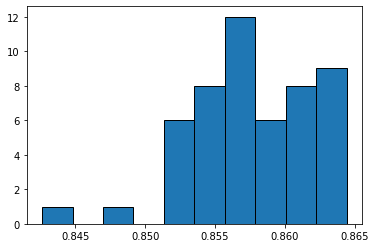

In [294]:
#create histogram to visualize values in dataset
plt.hist(meanCVscores_PCA, edgecolor='black')

In [295]:
standard_error = statistics.stdev(meanCVscores_PCA) / math.sqrt(len(meanCVscores_PCA))

In [296]:
statistics.stdev(meanCVscores_PCA)

0.004229535528399266

In [297]:
standard_error

0.0005922534365106376

In [298]:
#perform Shapiro-Wilk test for normality
shapiro(meanCVscores_PCA)

ShapiroResult(statistic=0.9442558884620667, pvalue=0.01825822703540325)

In [299]:
interval = standard_error * 1.96
lower_interval = mean(meanCVscores_PCA) - interval
upper_interval = mean(meanCVscores_PCA) + interval

In [300]:
lower_interval

0.8565373958340619

In [301]:
upper_interval

0.8588590293051837

# PCA for 3 freq

In [262]:
X_3_freq.shape

(1539, 11)

In [263]:
# make pca equal to number of current feature (105) to start with
pca_11 = PCA(n_components = 11, random_state=seed)
pca_11.fit(X_3_freq)
X_pca_11 = pca_11.transform(X_3_freq)

In [264]:
print(f"Variance explained by all 11 principal components = {sum(pca_11.explained_variance_ratio_ * 100)}")

Variance explained by all 11 principal components = 100.0


In [265]:
pca_11.explained_variance_ratio_ * 100

array([6.14218306e+01, 3.69285500e+01, 7.81599402e-01, 4.65652295e-01,
       1.71575888e-01, 1.51260618e-01, 6.16236671e-02, 1.07773600e-02,
       3.98484781e-03, 2.96118378e-03, 1.84068774e-04])

In [266]:
np.cumsum(pca_11.explained_variance_ratio_ * 100)

array([ 61.42183063,  98.35038067,  99.13198007,  99.59763237,
        99.76920825,  99.92046887,  99.98209254,  99.9928699 ,
        99.99685475,  99.99981593, 100.        ])

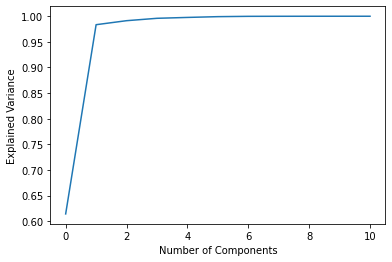

In [267]:
plt.plot(np.cumsum(pca_11.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

In [268]:
# # Scale all X data for PCA.
scaler = StandardScaler()
X_all_freq_scaled_3 = scaler.fit_transform(X_3_freq)

In [269]:
X_3_freq.head(2)

,RIAGENDR,RIDAGEMN,RIDRETH2,BMXWT,BMXHT,BIXS005K,BIXS050K,BIXS200K,BIXC005K,BIXC050K,BIXC200K
0,1,597,1,92.5,178.3,544.38,467.70,421.35,28.24,54.86,38.05
1,2,230,4,59.2,162.0,882.34,759.54,670.05,45.31,96.63,80.61


In [270]:
pca_11 = PCA(n_components = 11, random_state=0)
pca_11.fit(X_all_freq_scaled_3)
X_pca_11 = pca_11.transform(X_all_freq_scaled_3)

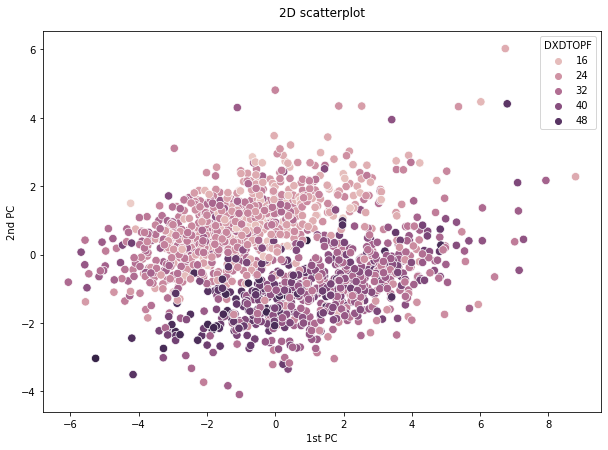

In [271]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_11[:, 0], y=X_pca_11[:, 1], s=70, hue=Y_all_freq)

plt.title("2D scatterplot", pad=15)
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.savefig('2d_scatter.png')

In [272]:
# try 99% of variance as this is not many more features
# 99% variablity
pca_3freq_99 = PCA(n_components = 0.99, random_state=0)
pca_3freq_99.fit(X_all_freq_scaled_3)
X_pca_3freq_99 = pca_3freq_99.transform(X_all_freq_scaled_3)

In [273]:
train_scaled_3_freqs = scaler.fit_transform(X_train_3_freqs)
test_scaled_3_freqs = scaler.transform(X_test_3_freqs)

In [274]:
# split data before feeding into model
X_train_pca_3freq_99, X_test_pca_3freq_99, y_train, y_test = train_test_split(X_pca_3freq_99, Y_all_freq, test_size=0.4, random_state=seed)

In [275]:
MLP_model_PCA_3freq_99 = MLPRegressor(random_state = seed,max_iter=1000)
train_and_test_MLPRegressor(MLP_model_PCA_3freq_99, X_train_pca_3freq_99, X_test_pca_3freq_99, y_train, y_test)

MSE model:  7.9853845871203575
RMSE model: 2.8258422792364684
R2:         0.9012267456332964
MAE:        2.214966817319797


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [276]:
%%time
# grid search for above PCA model
estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': (100, ), # 4
          'activation': ['relu','tanh','logistic', 'identity'], # 4
          'learning_rate': ['constant','adaptive', 'invscaling'], # 3
          'solver': ['adam', 'sgd', 'lbfgs']} # 3

gsc = RandomizedSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train_pca_3freq_99, y_train)

best_params_pca_3freq_99 = grid_result.best_params_
best_params_pca_3freq_99

CPU times: user 611 ms, sys: 114 ms, total: 726 ms
Wall time: 26 s


{'solver': 'lbfgs',
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': 100,
 'activation': 'identity'}

In [277]:
MLP_model_PCA_3freq_99_tuned = MLPRegressor(hidden_layer_sizes = best_params_pca_3freq_99["hidden_layer_sizes"],
                        activation = best_params_pca_3freq_99["activation"],
                        solver = best_params_pca_3freq_99["solver"],
                        max_iter= 500, random_state=seed,
              )
train_and_test_MLPRegressor(MLP_model_PCA_3freq_99_tuned, X_train_pca_3freq_99, X_test_pca_3freq_99, y_train, y_test, CV_flag=True)

MSE model:  8.98102603384682
RMSE model: 2.9968360038291753
R2:         0.8889114031719999
MAE:        2.359389824543019
Mean validation test scores:  0.8656842768952263
Mean testing scores:          0.8704148755639652


In [302]:
meanCVscores3_PCA = []
meanHoldOutscores3_PCA = []

MLP_model_base_tuned_high_performanceRE3_PCA = MLPRegressor(best_params_pca_3freq_99["hidden_layer_sizes"],
                        activation = best_params_pca_3freq_99["activation"],
                        solver = best_params_pca_3freq_99["solver"],
                        max_iter= 500)

for i in range(0,51):

  # for j in  range(0, k):
  X_trainRE3_PCA, X_testRE3_PCA, y_trainRE3_PCA, y_testRE3_PCA = train_test_split(X_pca_3freq_99, Y_all_freq, test_size=0.2, shuffle=True)

  # Scale data to increase performance.
  train_scaledRE3_PCA = scaler.fit_transform(X_trainRE3_PCA)
  test_scaledRE3_PCA = scaler.transform(X_testRE3_PCA)

  modelFit3_PCA = MLP_model_base_tuned_high_performanceRE.fit(train_scaledRE3_PCA, y_trainRE3_PCA)
  predictionsRE3_PCA = modelFit3_PCA.predict(test_scaledRE3_PCA)

  # make prediciton on hold out set
  skill_r2_hold_out3_PCA = r2_score(y_testRE3_PCA, predictionsRE3_PCA)

  meanHoldOutscores3_PCA.append(skill_r2_hold_out3_PCA)

  scoresCV3_PCA = cross_validate(MLP_model_base_tuned_high_performanceRE3_PCA, train_scaledRE3_PCA, y_trainRE3_PCA, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

  scoresCV_test3_PCA = mean(scoresCV3_PCA['test_r2'])

  # print(scoresCV)

  meanCVscores3_PCA.append(scoresCV_test3_PCA)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [303]:
meanHoldOutscores3_PCA

[0.8970971345149807,
 0.8919775030906469,
 0.8940343922604543,
 0.9039674889732209,
 0.9053582233755632,
 0.9128797470332933,
 0.9139997087537267,
 0.91728669393329,
 0.8710939859041498,
 0.8908481541825916,
 0.9048764742382954,
 0.8879922946575542,
 0.8944130841889698,
 0.9119376743074106,
 0.9111123680819764,
 0.8909696054517244,
 0.892240682318464,
 0.9099239485391153,
 0.9090912353839417,
 0.8626686320957807,
 0.9078006010809592,
 0.9057149476228348,
 0.8898994725010572,
 0.9092969234376627,
 0.9036863040532697,
 0.8905586885854236,
 0.8872838622692729,
 0.904980797209977,
 0.8955472776755085,
 0.9022009422052476,
 0.8812734543827558,
 0.9045991781934251,
 0.9154258914019607,
 0.9104054082489367,
 0.9099864420370655,
 0.9026343892399336,
 0.904410766755527,
 0.9016985361819843,
 0.8882879257974908,
 0.8928731391446869,
 0.9097513396612948,
 0.9036067022837295,
 0.9014024300375787,
 0.898599153173535,
 0.891494321516865,
 0.9111649713387683,
 0.908951662053579,
 0.8983505588677289,


In [304]:
meanCVscores3_PCA

[0.8746682116201268,
 0.8778640765654181,
 0.875350564619484,
 0.8781331693639947,
 0.8695529149330483,
 0.8679081554015718,
 0.8698483974330706,
 0.8694768640476791,
 0.8822541547531078,
 0.8709474548491848,
 0.8712504992652041,
 0.8759366643813717,
 0.8753052186520127,
 0.8712143481750649,
 0.8710535559874233,
 0.8754196666259384,
 0.8789022615313581,
 0.8719700782436716,
 0.8707032909411316,
 0.8842174523198137,
 0.869201447877168,
 0.8727380460267998,
 0.8751852658518929,
 0.8755434443971366,
 0.8739749070411328,
 0.8776942293109853,
 0.8792598361915459,
 0.8714984866493551,
 0.8751855350813242,
 0.8727079415792145,
 0.8801373537229369,
 0.869618935767987,
 0.8664295573091728,
 0.8697975688445398,
 0.870634504986004,
 0.873955568588847,
 0.8734193147414506,
 0.8739946784846098,
 0.8774467139820399,
 0.8758934071815965,
 0.8729460006333157,
 0.874149450767832,
 0.8719455838554785,
 0.8762792633925389,
 0.8769057247754007,
 0.8698384518426572,
 0.8683641011503134,
 0.8771242994872832

(array([2., 9., 9., 6., 8., 7., 5., 3., 1., 1.]),
 array([0.86642956, 0.86820835, 0.86998714, 0.87176593, 0.87354472,
        0.8753235 , 0.87710229, 0.87888108, 0.88065987, 0.88243866,
        0.88421745]),
 <a list of 10 Patch objects>)

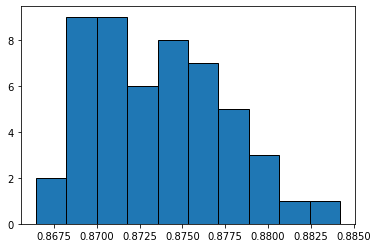

In [305]:
#create histogram to visualize values in dataset
plt.hist(meanCVscores3_PCA, edgecolor='black')

In [306]:
standard_error = statistics.stdev(meanCVscores3_PCA) / math.sqrt(len(meanCVscores3_PCA))

In [307]:
statistics.stdev(meanCVscores3_PCA)

0.003819712607844107

In [308]:
standard_error

0.0005348667491474795

In [309]:
#perform Shapiro-Wilk test for normality
shapiro(meanCVscores3_PCA)

ShapiroResult(statistic=0.9702129364013672, pvalue=0.22570878267288208)

In [310]:
interval = standard_error * 1.96
lower_interval = mean(meanCVscores3_PCA) - interval
upper_interval = mean(meanCVscores3_PCA) + interval

In [311]:
lower_interval

0.8725831333074261

In [312]:
upper_interval

0.8746798109640843

# lets explore the relationships between variables and target variable

In [289]:
df_all_freq.columns.values

array(['RIAGENDR', 'RIDAGEMN', 'RIDRETH2', 'BMXWT', 'BMXHT', 'BIXS005K',
       'BIXS006K', 'BIXS007K', 'BIXS008K', 'BIXS009K', 'BIXS010K',
       'BIXS011K', 'BIXS012K', 'BIXS013K', 'BIXS014K', 'BIXS015K',
       'BIXS016K', 'BIXS018K', 'BIXS020K', 'BIXS023K', 'BIXS025K',
       'BIXS028K', 'BIXS031K', 'BIXS035K', 'BIXS039K', 'BIXS043K',
       'BIXS050K', 'BIXS054K', 'BIXS060K', 'BIXS067K', 'BIXS075K',
       'BIXS083K', 'BIXS093K', 'BIXS100K', 'BIXS115K', 'BIXS128K',
       'BIXS143K', 'BIXS159K', 'BIXS177K', 'BIXS200K', 'BIXS220K',
       'BIXS245K', 'BIXS273K', 'BIXS304K', 'BIXS339K', 'BIXS378K',
       'BIXS421K', 'BIXS469K', 'BIXS500K', 'BIXS582K', 'BIXS649K',
       'BIXS723K', 'BIXS806K', 'BIXS898K', 'BIXS1M', 'BIXC005K',
       'BIXC006K', 'BIXC007K', 'BIXC008K', 'BIXC009K', 'BIXC010K',
       'BIXC011K', 'BIXC012K', 'BIXC013K', 'BIXC014K', 'BIXC015K',
       'BIXC016K', 'BIXC018K', 'BIXC020K', 'BIXC023K', 'BIXC025K',
       'BIXC028K', 'BIXC031K', 'BIXC035K', 'BIXC039K', 'BI

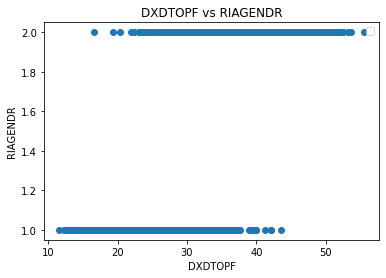

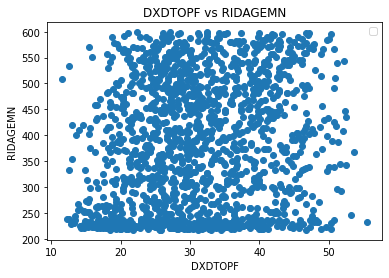

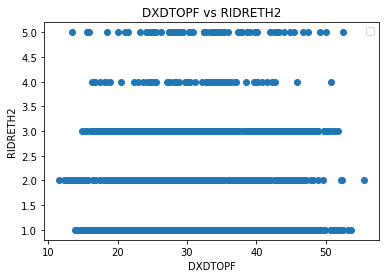

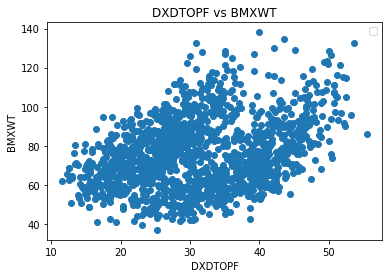

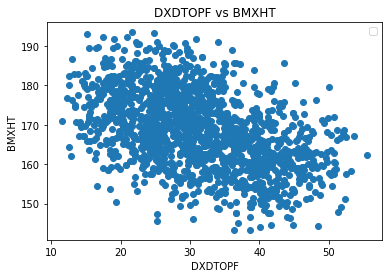

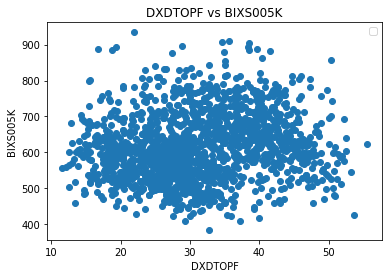

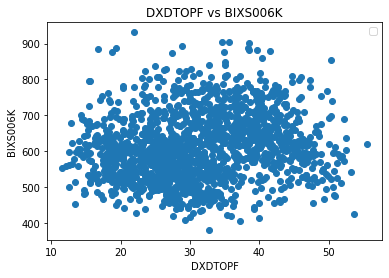

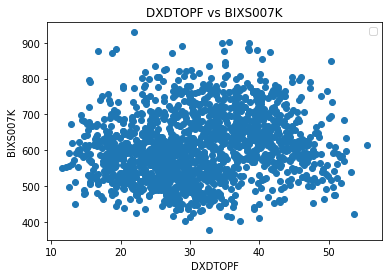

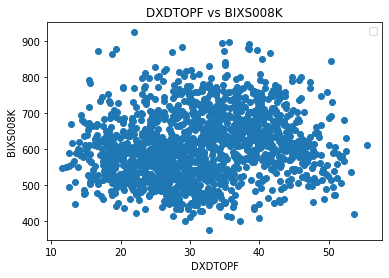

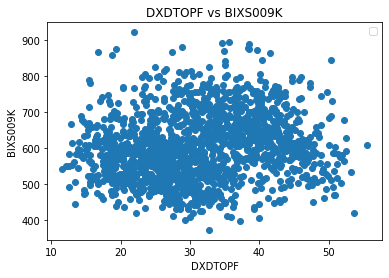

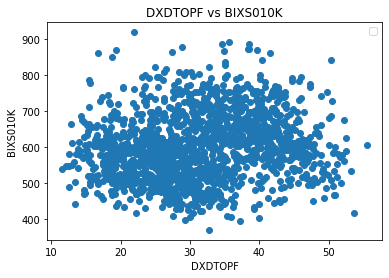

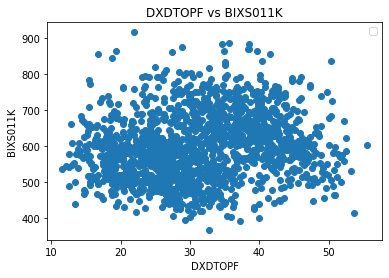

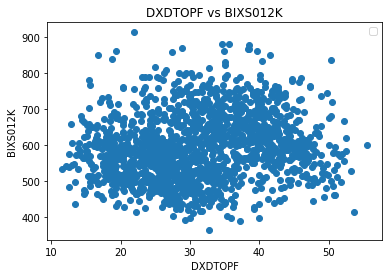

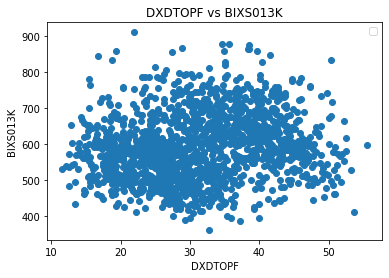

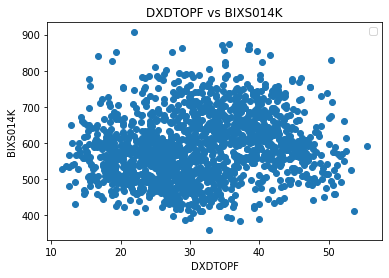

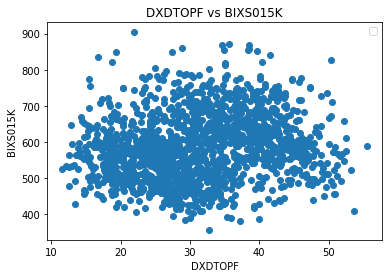

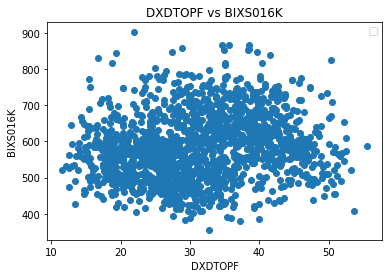

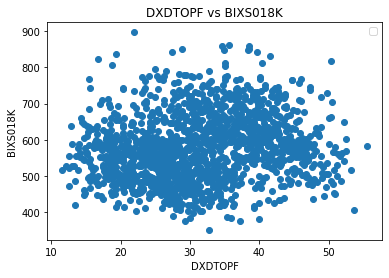

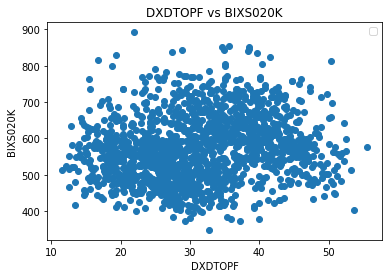

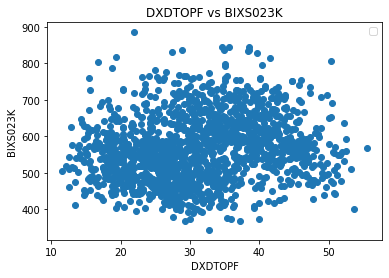

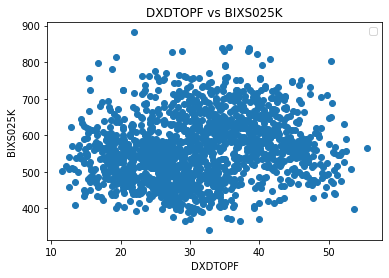

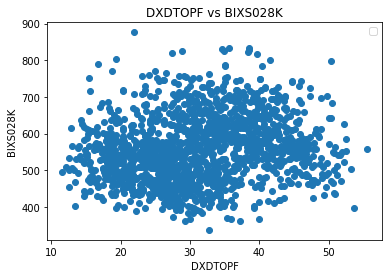

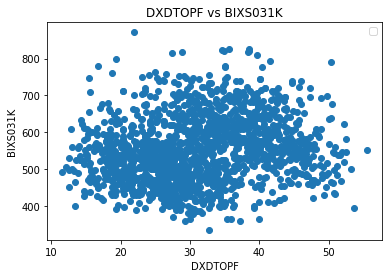

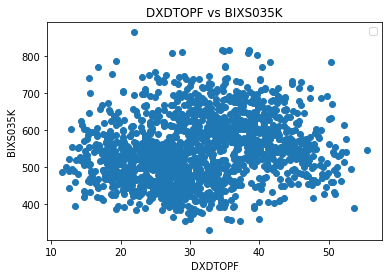

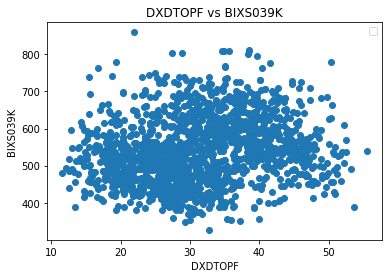

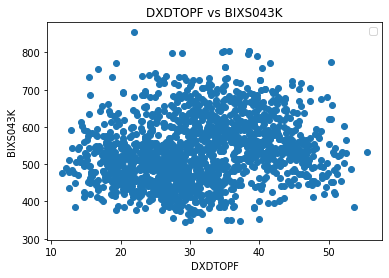

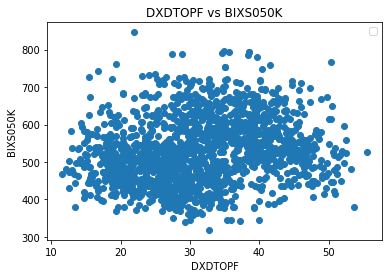

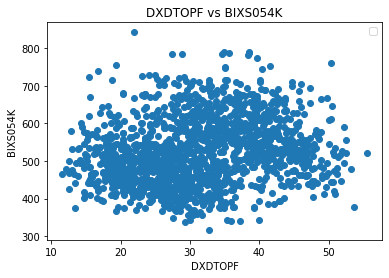

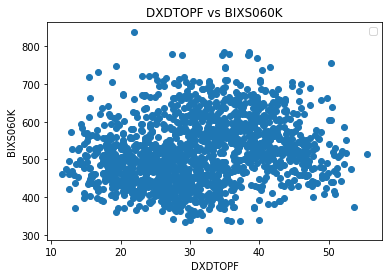

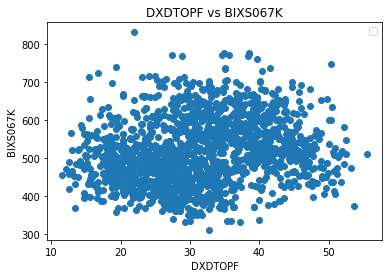

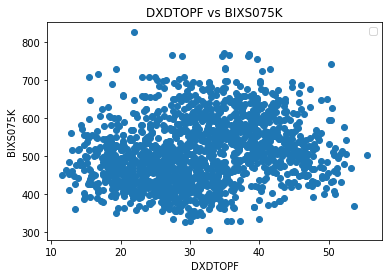

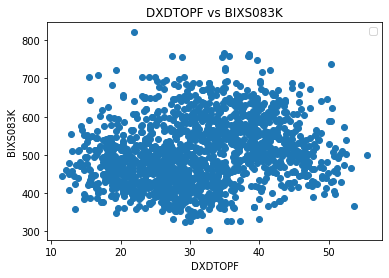

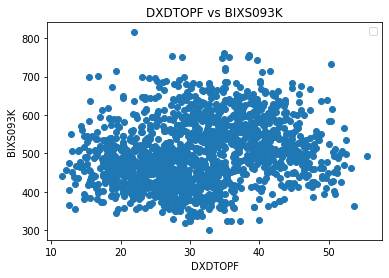

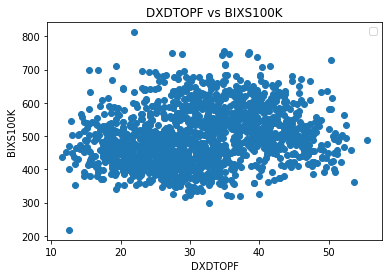

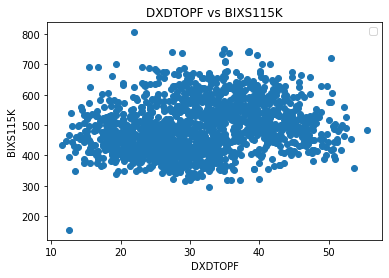

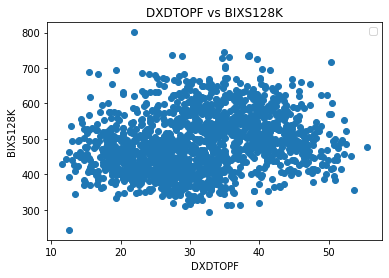

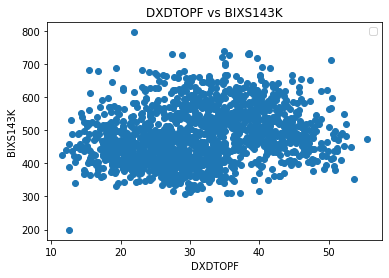

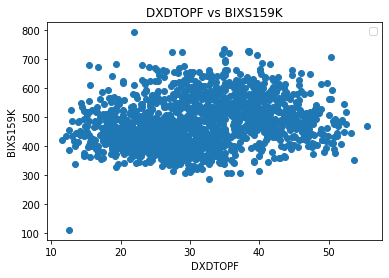

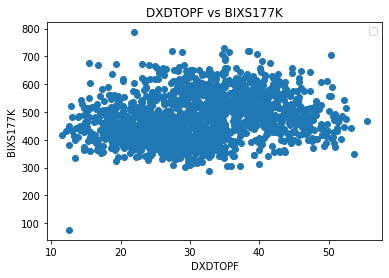

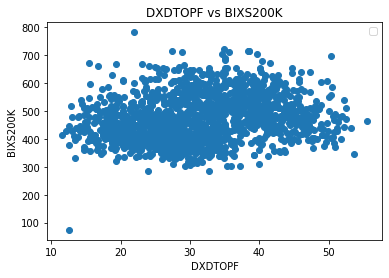

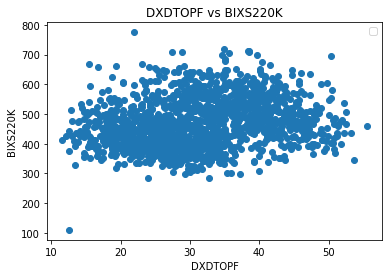

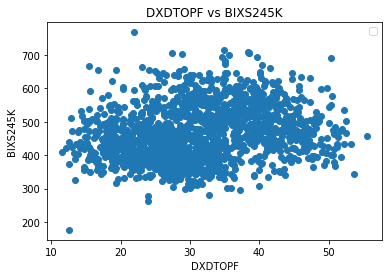

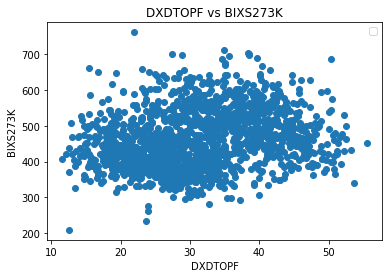

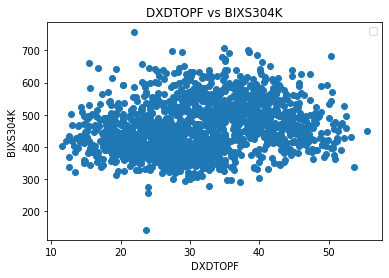

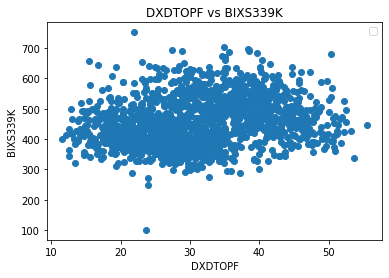

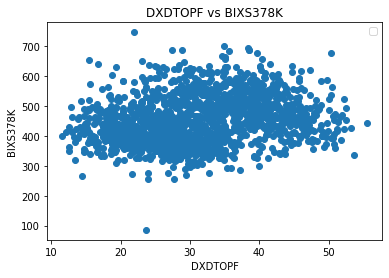

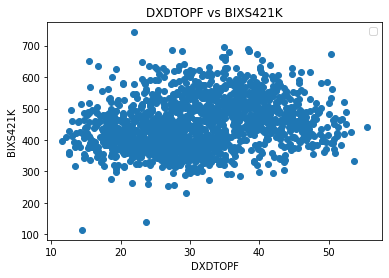

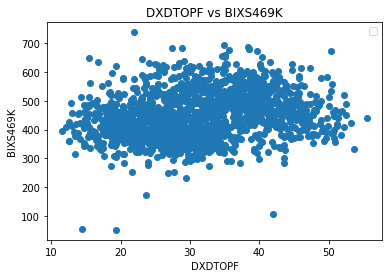

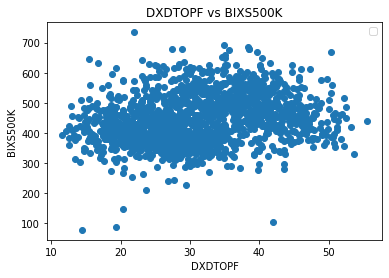

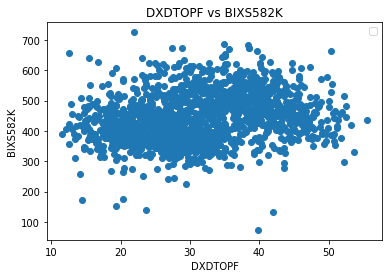

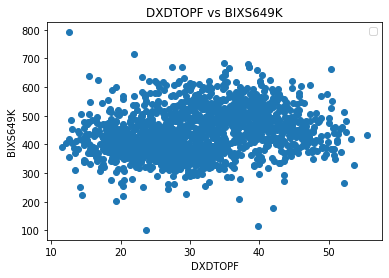

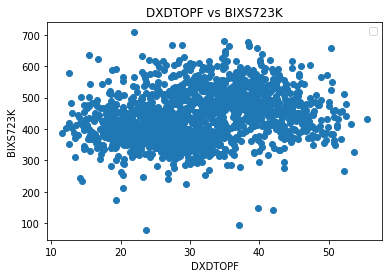

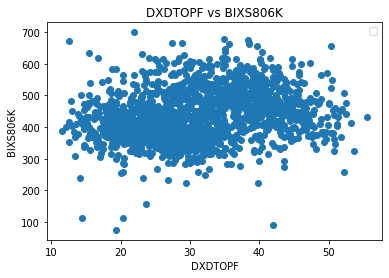

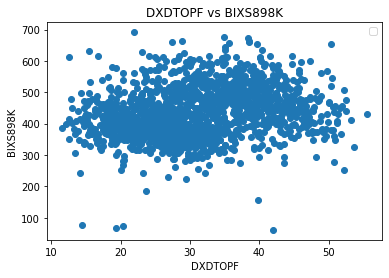

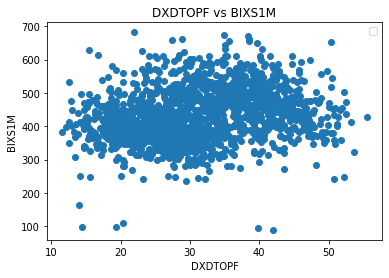

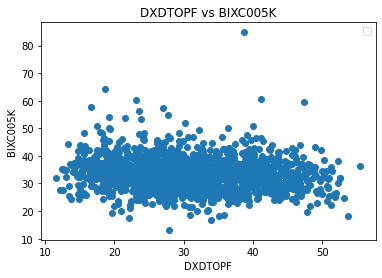

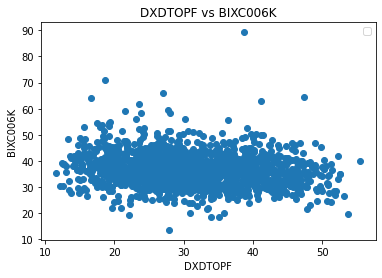

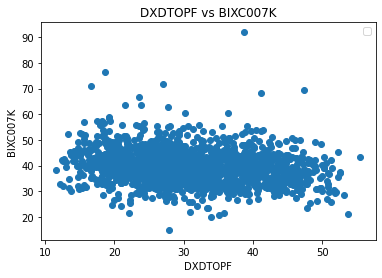

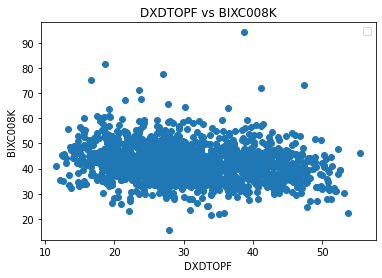

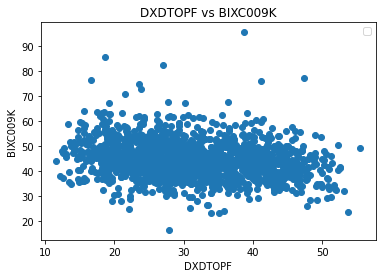

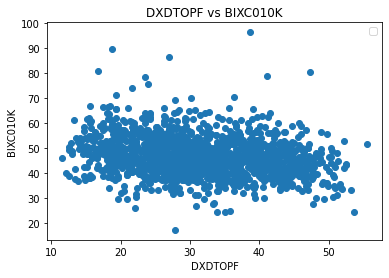

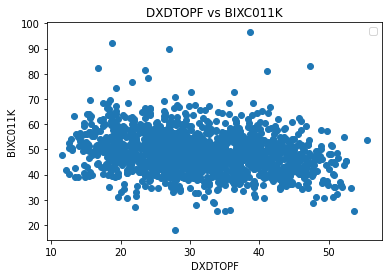

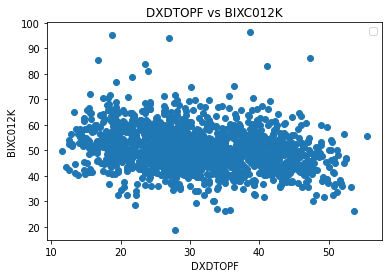

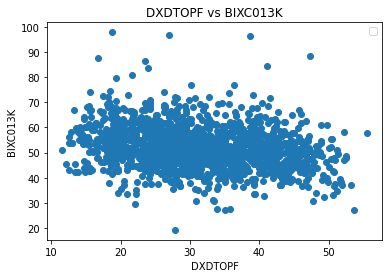

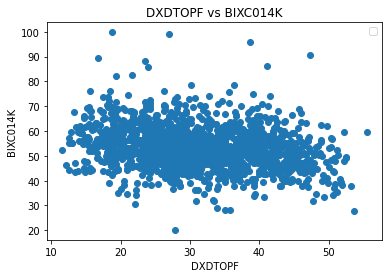

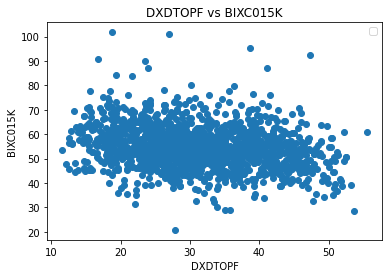

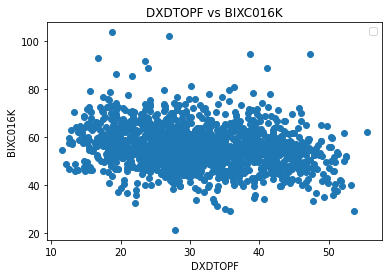

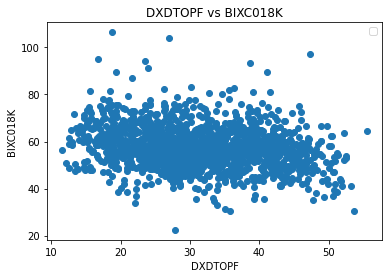

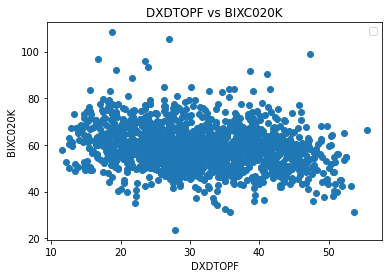

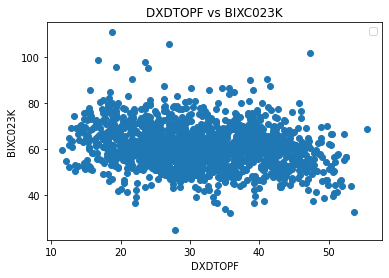

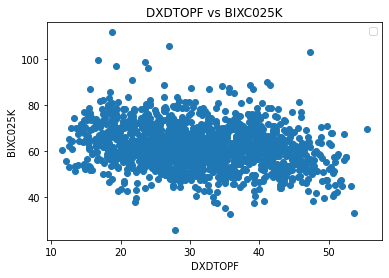

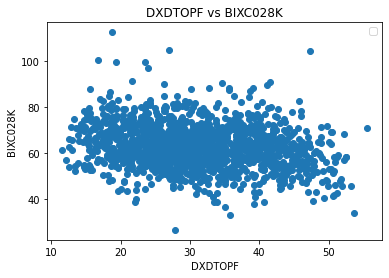

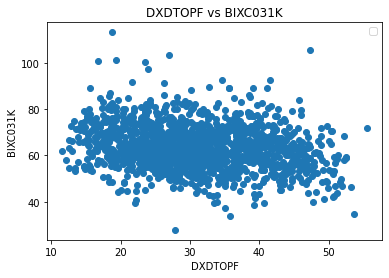

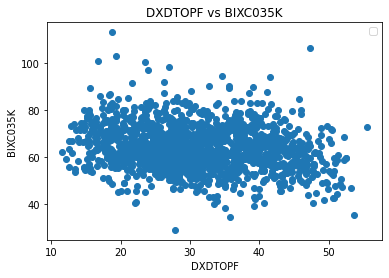

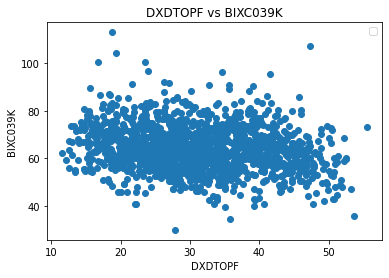

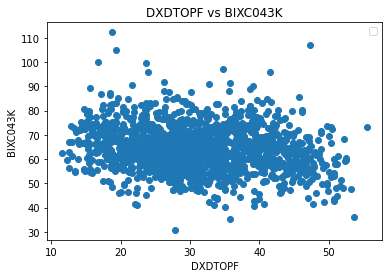

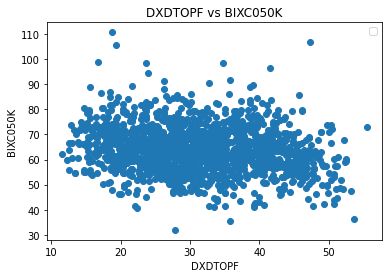

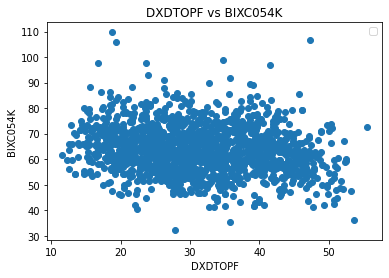

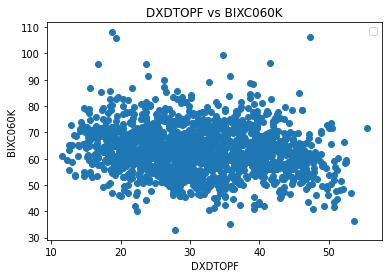

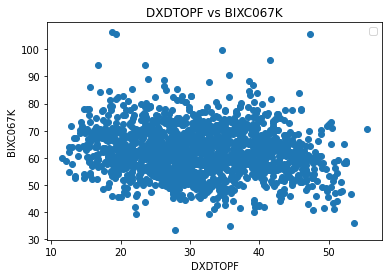

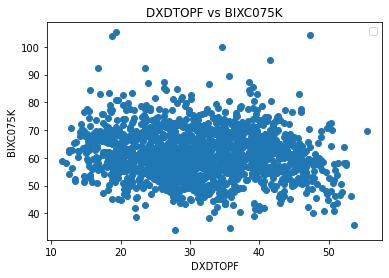

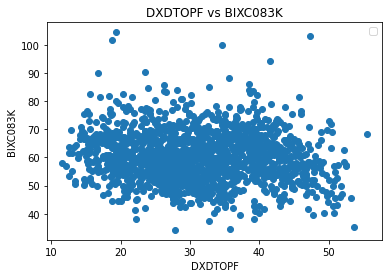

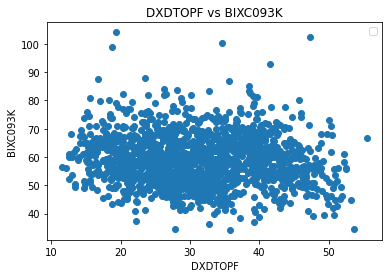

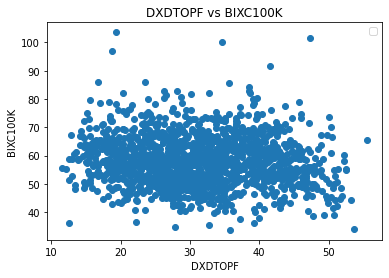

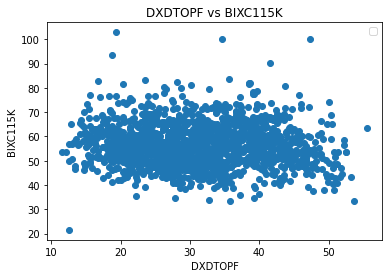

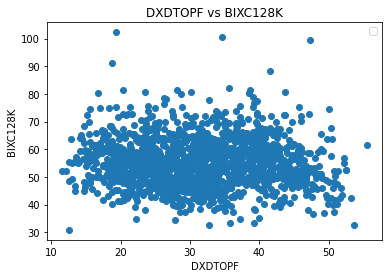

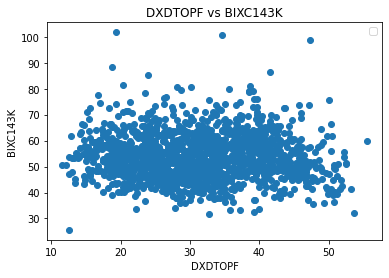

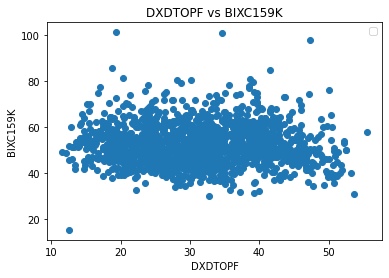

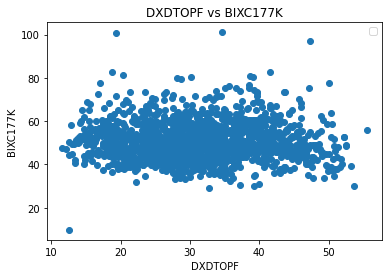

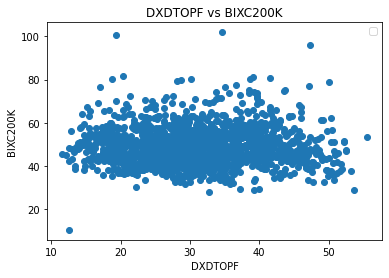

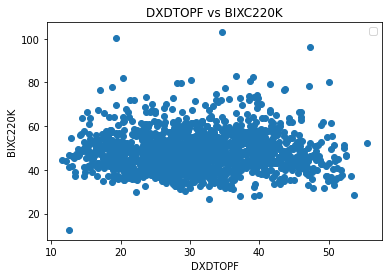

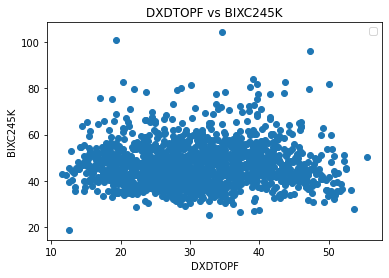

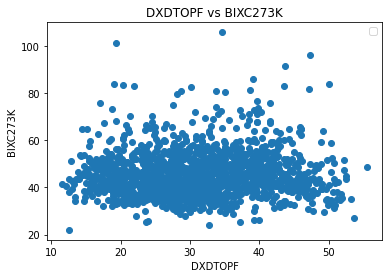

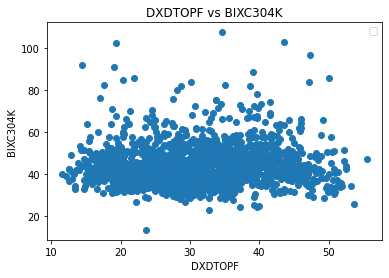

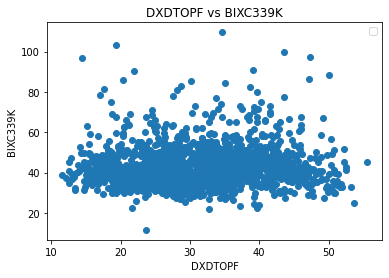

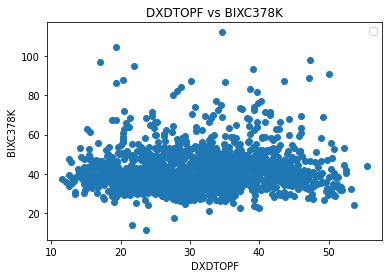

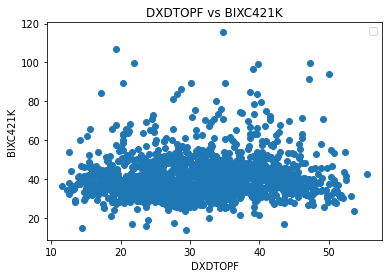

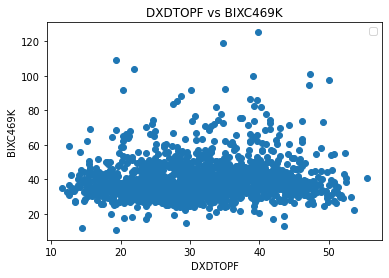

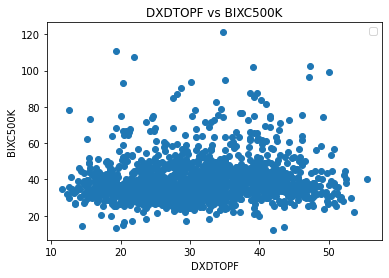

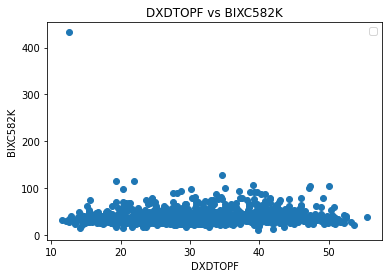

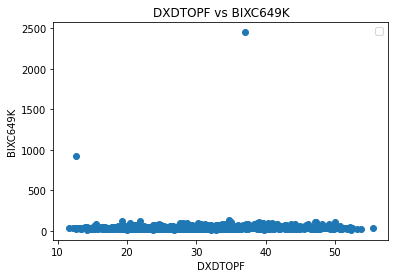

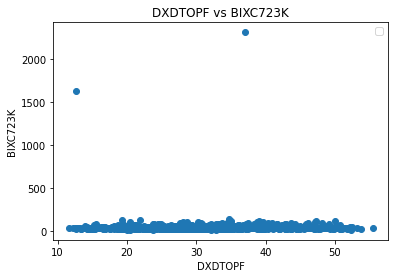

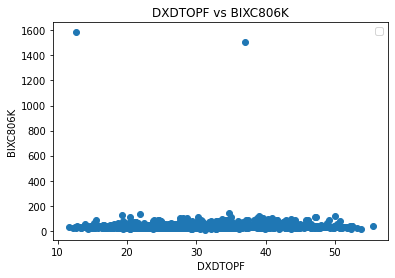

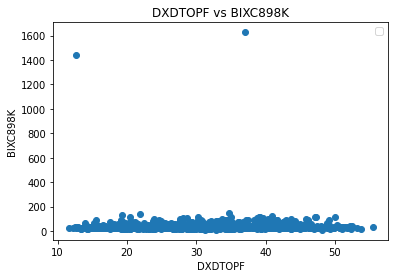

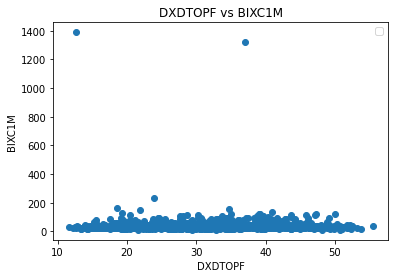

In [290]:
x_col = 'DXDTOPF'
y_columns = df_all_freq.columns.values[:-1]


for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_all_freq[x_col], df_all_freq[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()

only linear relationships shown are from height, weight and waist circumnference